# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [2]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

In [3]:
file_db = "~/Downloads/chinook.sqlite"
model_name = 'qwen2:7b'

clean_and_train = True  # False  

In [4]:
config = {
    'model': model_name,   # 'mistral' # "starcoder2"
}
vn = MyVanna(config=config)

In [5]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: ducklover1


In [6]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [7]:
vn.run_sql_is_set

True

In [8]:
def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

In [9]:
def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

In [10]:
if clean_and_train:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [11]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [12]:
df_ddl

,type,sql
0,table,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [13]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")


Adding ddl: CREATE TABLE "albums"
(
    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE "artists"
(
    ArtistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Name NVARCHAR(120)
)
Adding ddl: CREATE TABLE "customers"
(
    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TAB

In [14]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl,None,"CREATE TABLE ""artists""\r\n(\r\n ArtistId IN...",ddl
1,0db84e3d-ef41-563c-803e-21c1b985dc19-ddl,None,"CREATE TABLE ""invoices""\r\n(\r\n InvoiceId ...",ddl
2,10cba811-ddba-5042-9e90-d764dfcd1629-ddl,None,"CREATE INDEX IFK_InvoiceCustomerId ON ""invoice...",ddl
3,2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl,None,"CREATE INDEX IFK_CustomerSupportRepId ON ""cust...",ddl
4,37319c81-65f7-50ee-956b-795de244bee5-ddl,None,"CREATE TABLE sqlite_stat1(tbl,idx,stat)",ddl
5,40bd77cd-e1de-5872-8693-624117ff413c-ddl,None,"CREATE INDEX IFK_InvoiceLineInvoiceId ON ""invo...",ddl
6,41130543-7164-562a-90a7-0fd0a409c154-ddl,None,"CREATE TABLE ""albums""\r\n(\r\n AlbumId INTE...",ddl
7,458debc8-8082-5450-a17a-66028bd55ace-ddl,None,"CREATE TABLE ""playlists""\r\n(\r\n PlaylistI...",ddl
8,4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl,None,"CREATE TABLE ""invoice_items""\r\n(\r\n Invoi...",ddl
9,48d484e9-984c-58ff-b391-75521c69d486-ddl,None,"CREATE INDEX IFK_PlaylistTrackTrackId ON ""play...",ddl


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

In [15]:
ts_start = time()

```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE sqlite_stat1(tbl,idx,stat)\n\nCREATE TABLE sqlite_sequence(name,seq)\n\nCREATE TABLE "playlists"\r\n(\r\n    PlaylistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "genres"\r\n(\r\n    GenreId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO

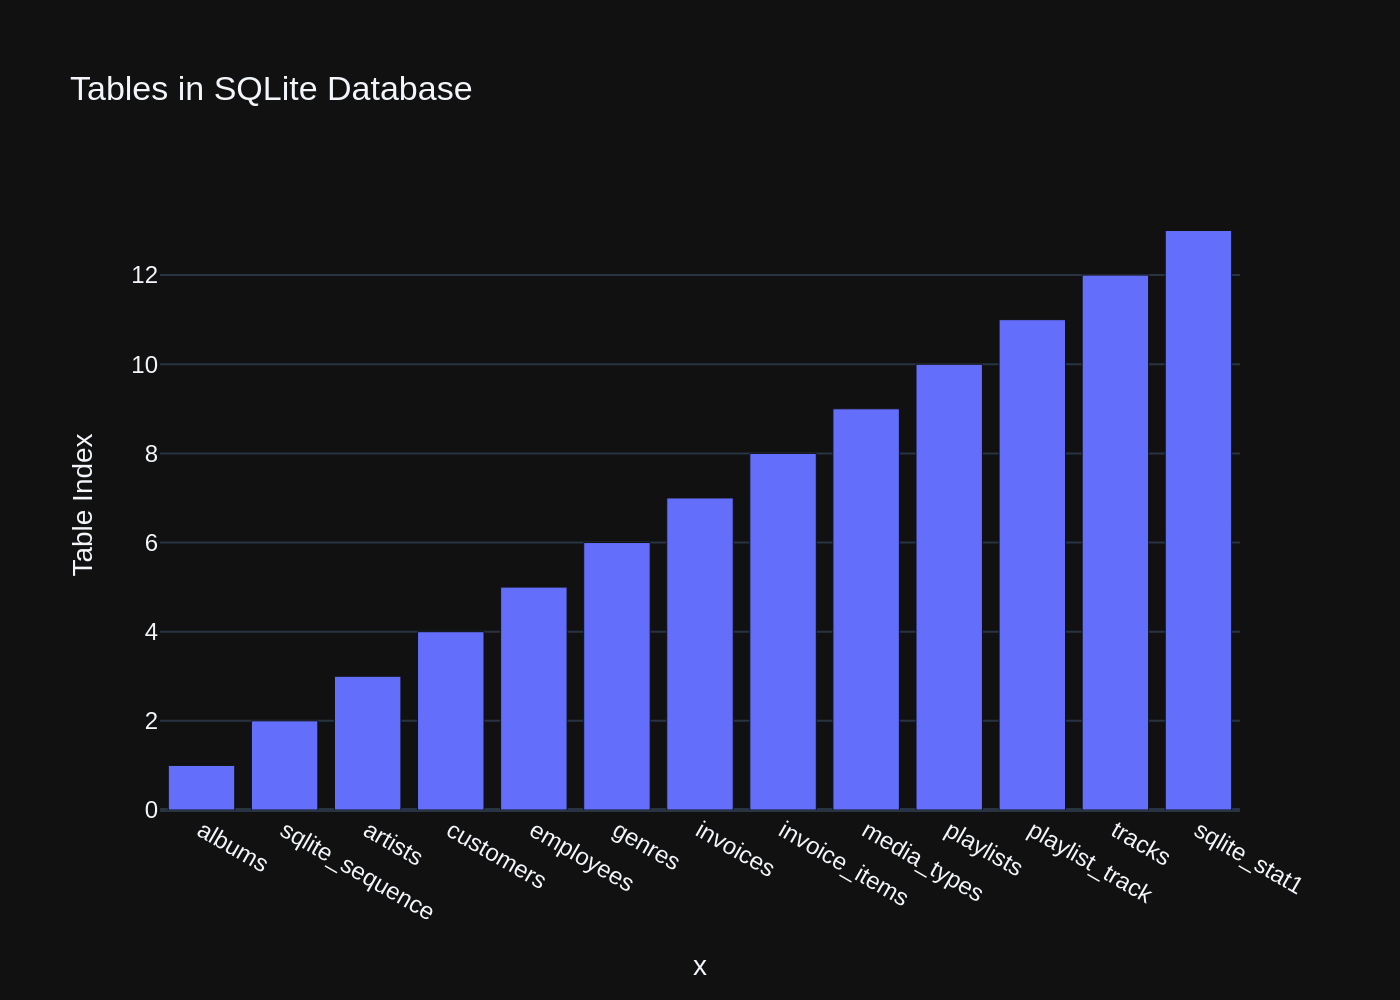

("SELECT name FROM sqlite_master WHERE type='table'",
                name
 0            albums
 1   sqlite_sequence
 2           artists
 3         customers
 4         employees
 5            genres
 6          invoices
 7     invoice_items
 8       media_types
 9         playlists
 10   playlist_track
 11           tracks
 12     sqlite_stat1,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['albums', 'sqlite_sequence', 'artists', 'customers', 'employees',
                           'genres', 'invoices', 'invoice_items', 'media_types', 'playlists',
                           'playlist_t

In [16]:
vn.ask(question="Can you list all tables in the SQLite database catalog?")

In [17]:
vn.ask(question="which table stores customer's orders")

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_CustomerSupportRepId ON "customers" (SupportRepId)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n

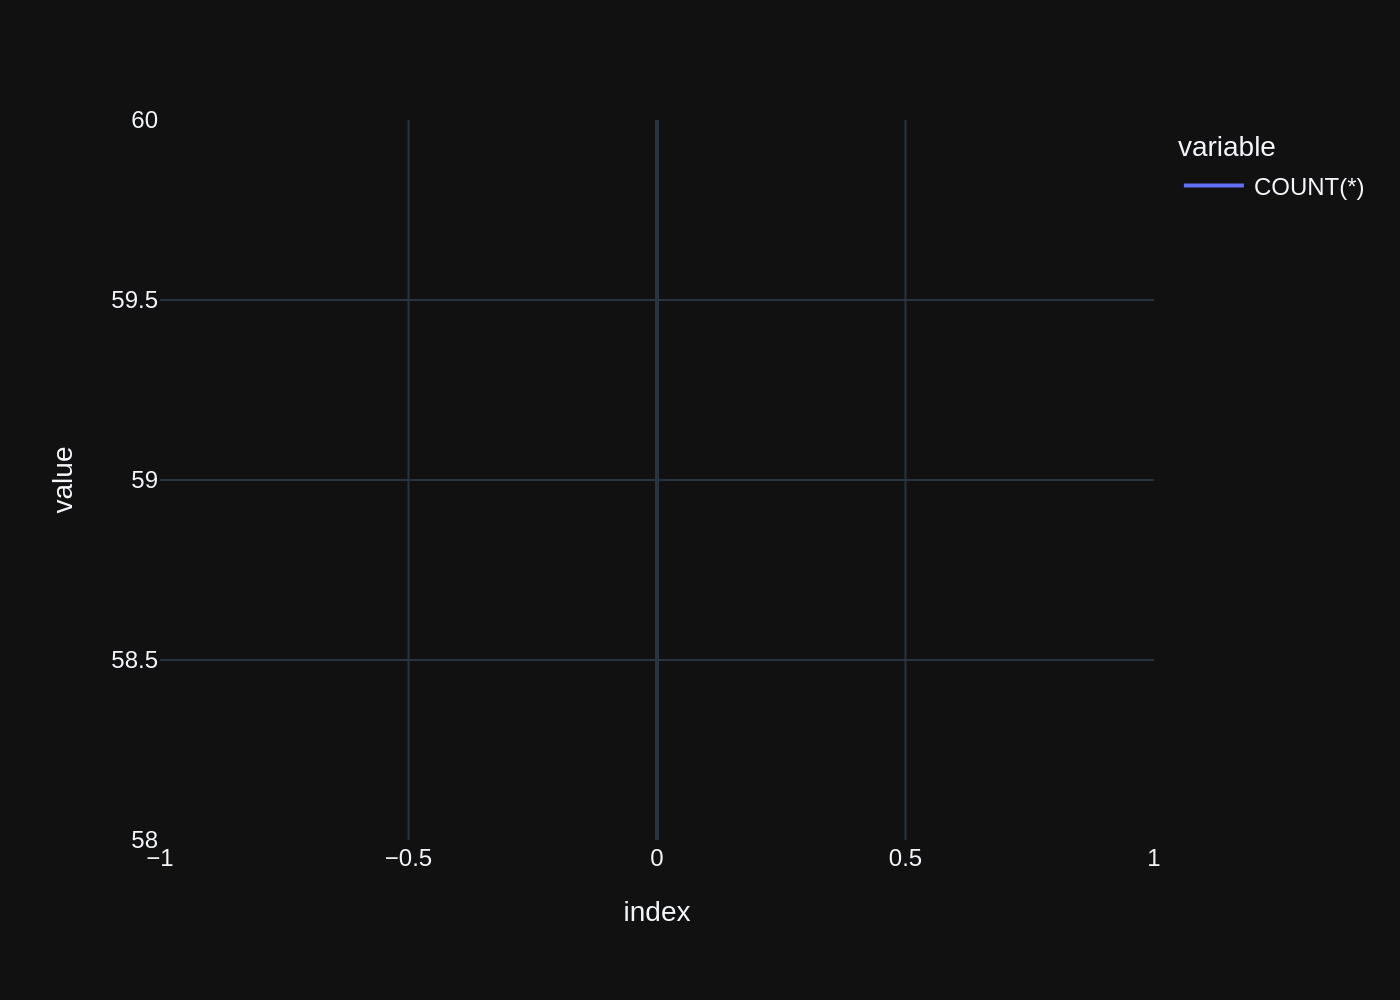

('SELECT COUNT(*) FROM customers',
    COUNT(*)
 0        59,
 Figure({
     'data': [{'hovertemplate': 'variable=COUNT(*)<br>index=%{x}<br>value=%{y}<extra></extra>',
               'legendgroup': 'COUNT(*)',
               'line': {'color': '#636efa', 'dash': 'solid'},
               'marker': {'symbol': 'circle'},
               'mode': 'lines',
               'name': 'COUNT(*)',
               'orientation': 'v',
               'showlegend': True,
               'type': 'scatter',
               'x': array([0]),
               'xaxis': 'x',
               'y': array([59]),
               'yaxis': 'y'}],
     'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...',
                'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
                'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
 }))

In [18]:
vn.ask(question="How many customers are there")

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    Company NVARCHAR(80),\r\n    Address NVARCHAR(70),\r\n    City NVAR

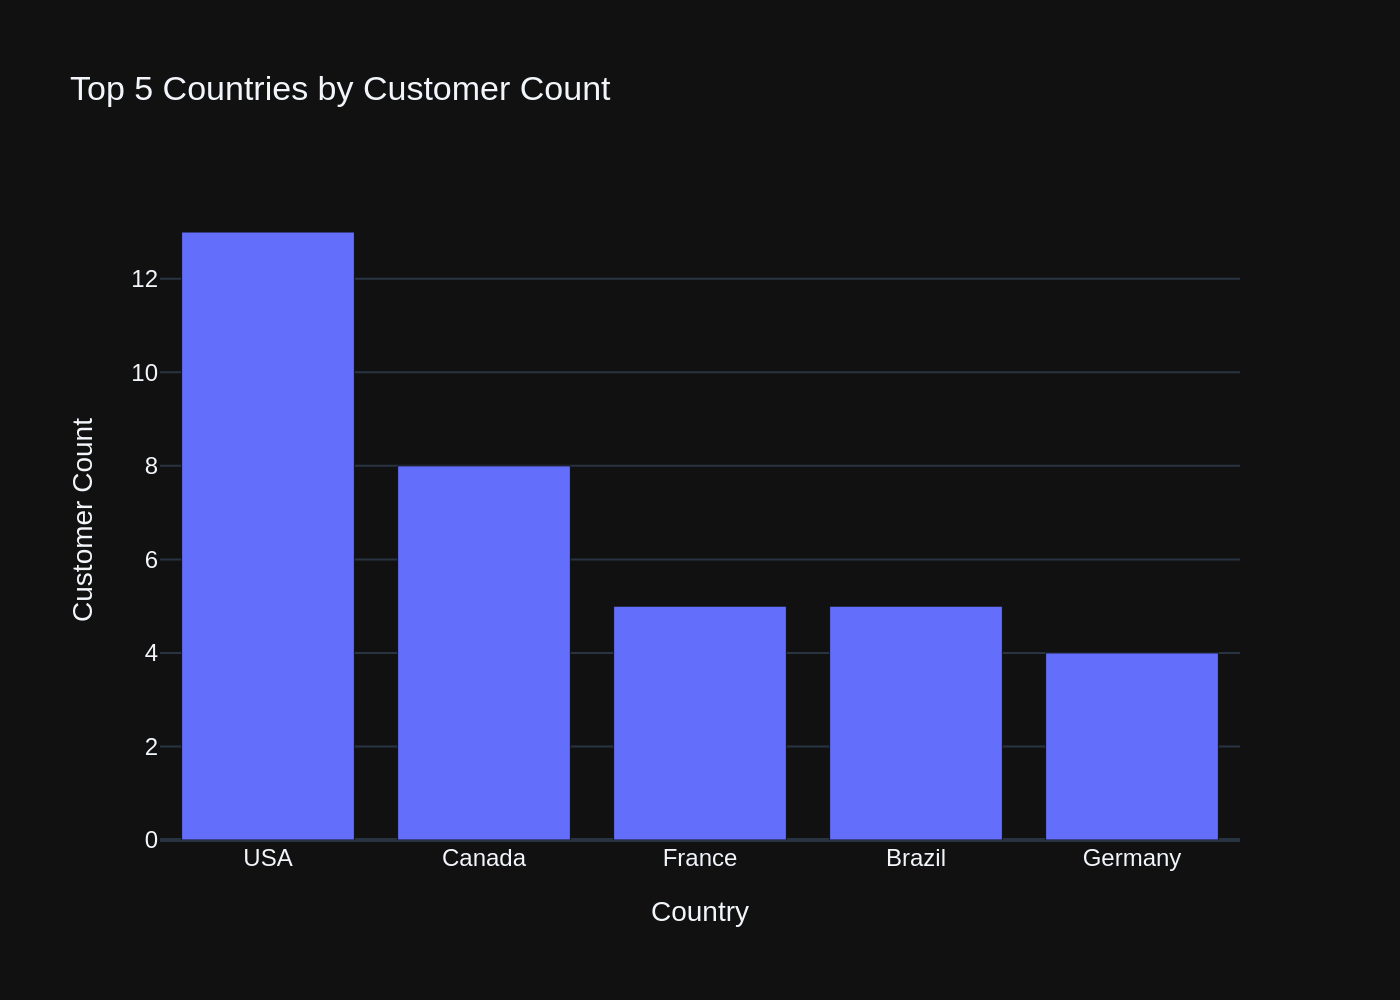

('SELECT Country, COUNT(CustomerId) as Count \nFROM customers \nGROUP BY Country \nORDER BY Count DESC \nLIMIT 5',
    Country  Count
 0      USA     13
 1   Canada      8
 2   France      5
 3   Brazil      5
 4  Germany      4,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Country=%{x}<br>Count=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['USA', 'Canada', 'France', 'Brazil', 'Germany'], dtype=object),
               'xaxis': 'x',
               'y': array([13,  8,  5,  5,  4]),
               'yaxis': 'y'}],
     'layout': {'barmode': 'relative',
                'legend': {'tracegroupgap': 0},
                'template': '...',
            

In [19]:
vn.ask(question="what are the top 5 countries that customers come from?")

### More SQL questions

see `sample-sql-queries-sqlite-chinook.ipynb`

Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_AlbumArtistId ON "albums" (ArtistId)\n\nCREATE TABLE "albums"\r\n(\r\n    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Title NVARCHAR(160)  NOT NULL,\r\n    ArtistId INTEGER  NOT NULL,\r\n    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE

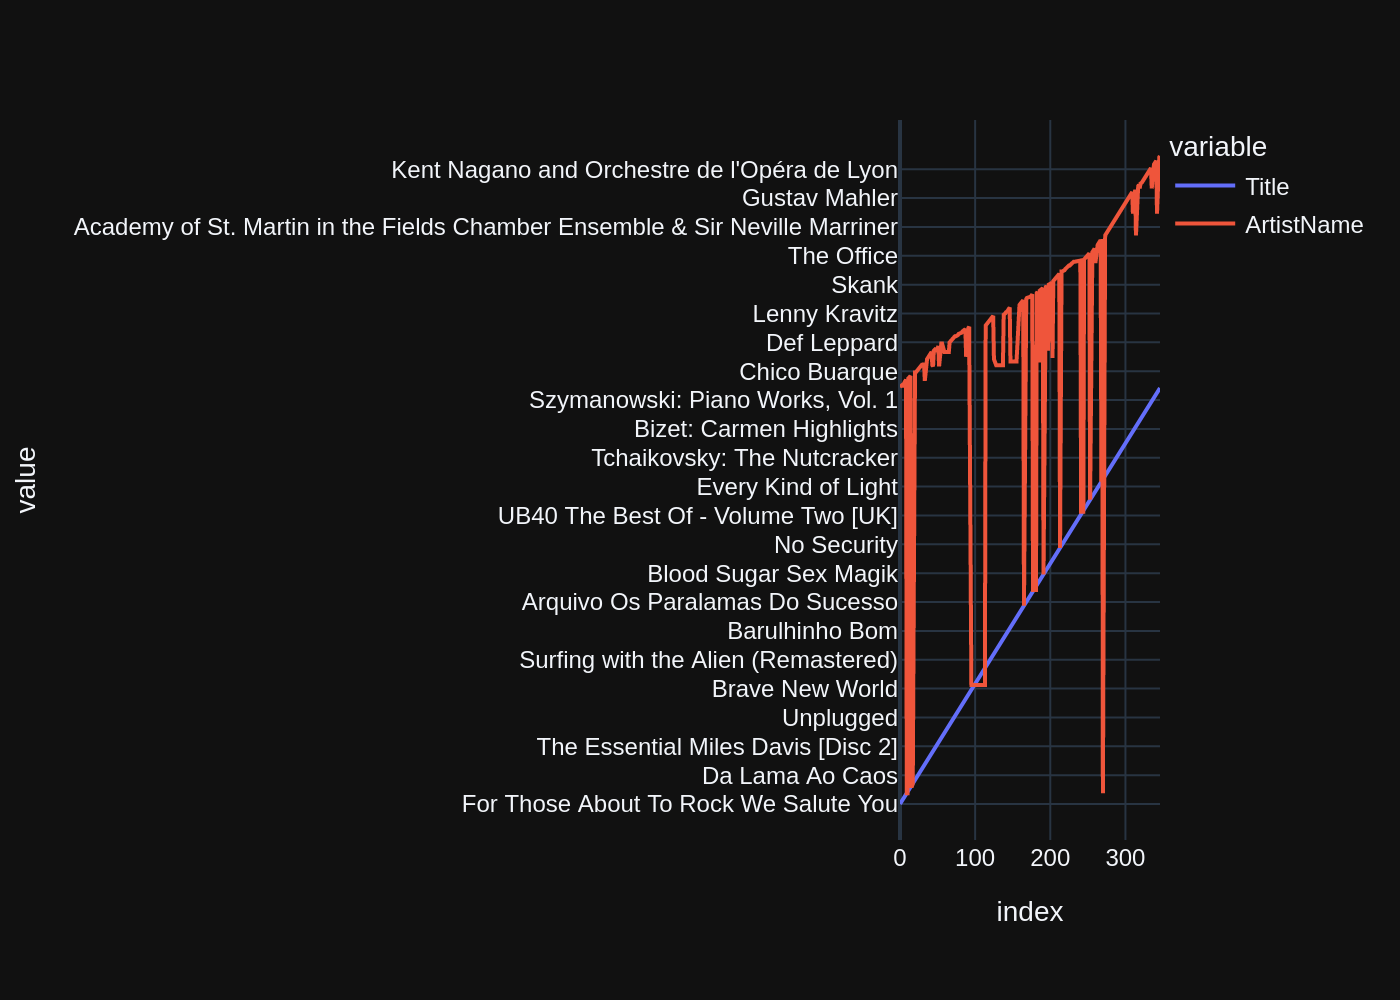

('SELECT a.Title, ar.Name AS ArtistName \nFROM albums a \nJOIN artists ar ON a.ArtistId = ar.ArtistId',
                                                  Title  \
 0                For Those About To Rock We Salute You   
 1                                    Balls to the Wall   
 2                                    Restless and Wild   
 3                                    Let There Be Rock   
 4                                             Big Ones   
 ..                                                 ...   
 342                             Respighi:Pines of Rome   
 343  Schubert: The Late String Quartets & String Qu...   
 344                                Monteverdi: L'Orfeo   
 345                              Mozart: Chamber Music   
 346  Koyaanisqatsi (Soundtrack from the Motion Pict...   
 
                                             ArtistName  
 0                                                AC/DC  
 1                                               Accept  
 2          

In [20]:
question = """  
    List all albums and their corresponding artist names  
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON "tracks" (GenreId)\n\nCREATE INDEX IFK_PlaylistTrackTrackId ON "playlist_track" (TrackId)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaType

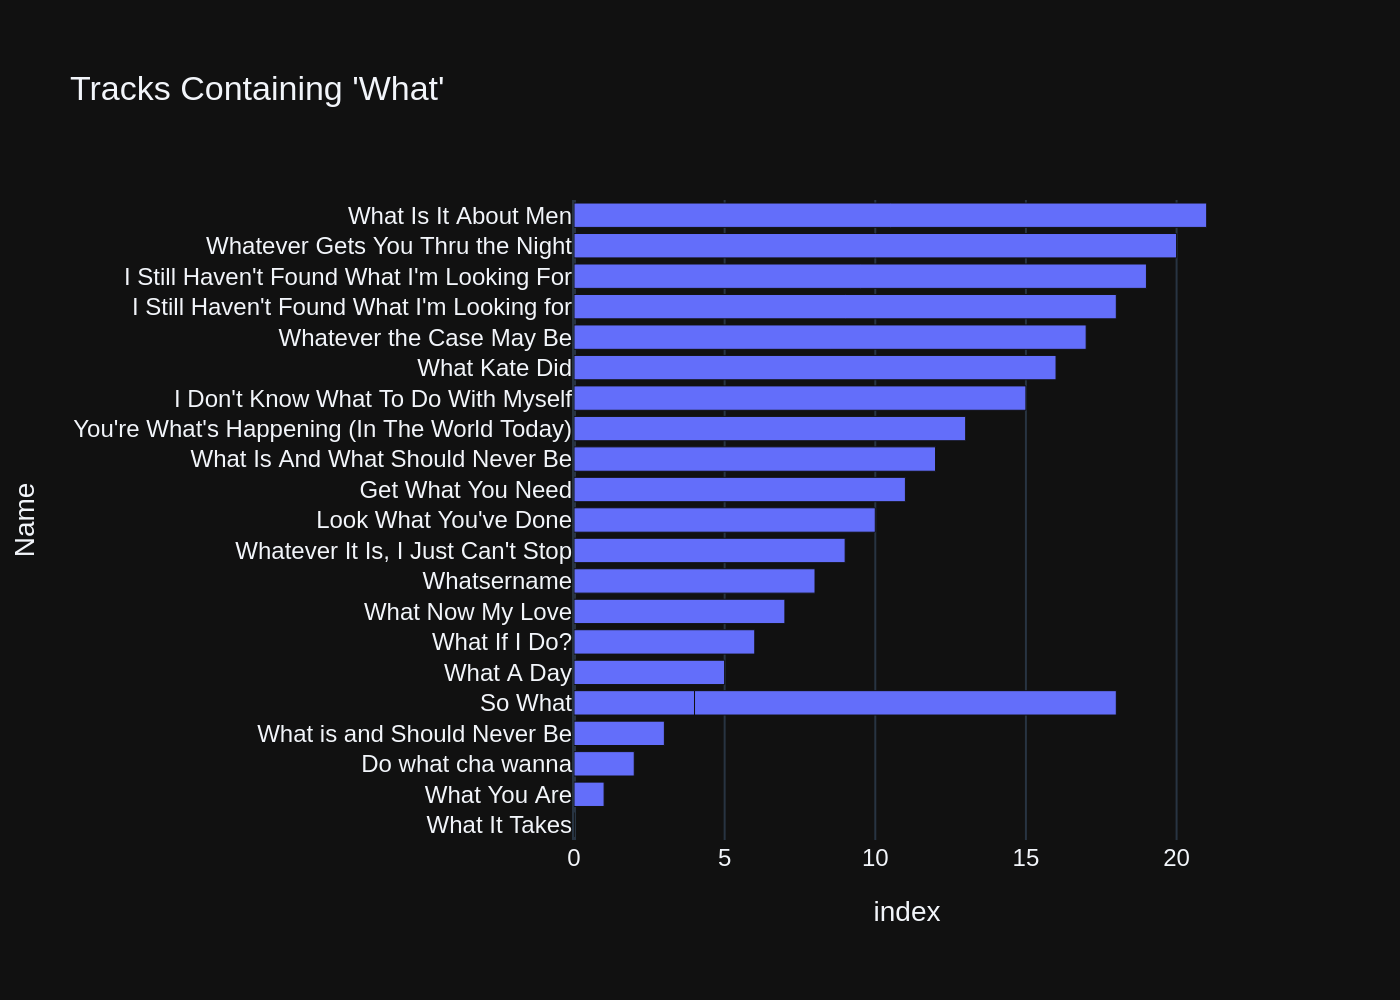

("SELECT Name FROM tracks WHERE Name LIKE '%What%' COLLATE NOCASE",
                                             Name
 0                                  What It Takes
 1                                   What You Are
 2                              Do what cha wanna
 3                    What is and Should Never Be
 4                                        So What
 5                                     What A Day
 6                                  What If I Do?
 7                               What Now My Love
 8                                    Whatsername
 9              Whatever It Is, I Just Can't Stop
 10                         Look What You've Done
 11                             Get What You Need
 12              What Is And What Should Never Be
 13  You're What's Happening (In The World Today)
 14                                       So What
 15           I Don't Know What To Do With Myself
 16                                 What Kate Did
 17                      Whateve

In [21]:
question = """  
    Find all tracks with a name containing "What" (case-insensitive)
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 5, updating n_results = 5
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Invo

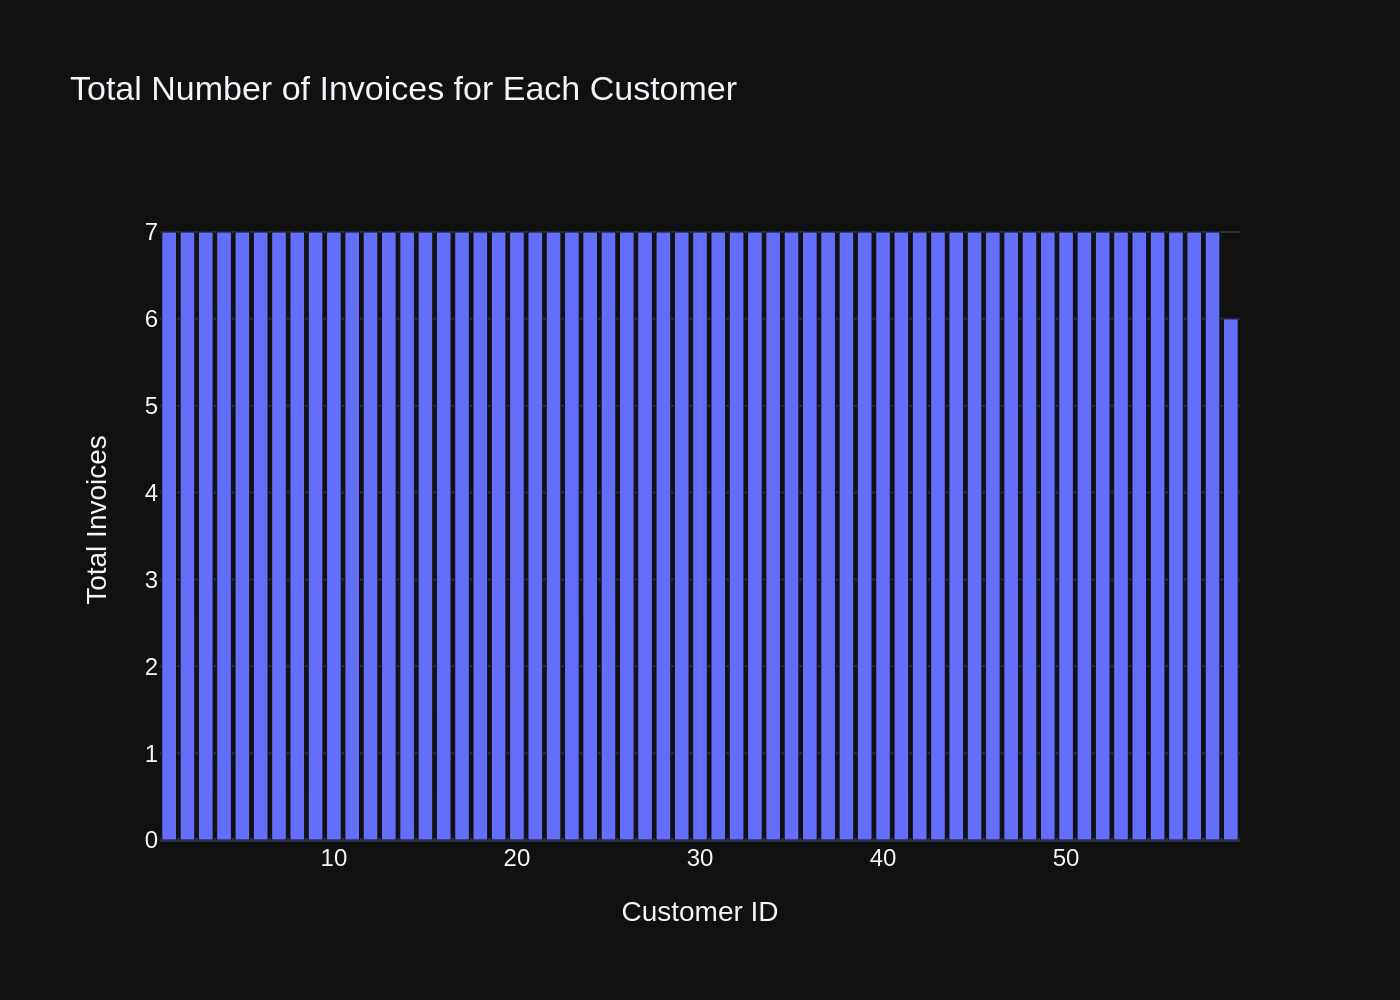

('SELECT CustomerId, COUNT(InvoiceId) as TotalInvoices \nFROM invoices \nGROUP BY CustomerId',
     CustomerId  TotalInvoices
 0            1              7
 1            2              7
 2            3              7
 3            4              7
 4            5              7
 5            6              7
 6            7              7
 7            8              7
 8            9              7
 9           10              7
 10          11              7
 11          12              7
 12          13              7
 13          14              7
 14          15              7
 15          16              7
 16          17              7
 17          18              7
 18          19              7
 19          20              7
 20          21              7
 21          22              7
 22          23              7
 23          24              7
 24          25              7
 25          26              7
 26          27              7
 27          28              7
 28   

In [22]:
question = """  
    Get the total number of invoices for each customer
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 6, updating n_results = 6
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r

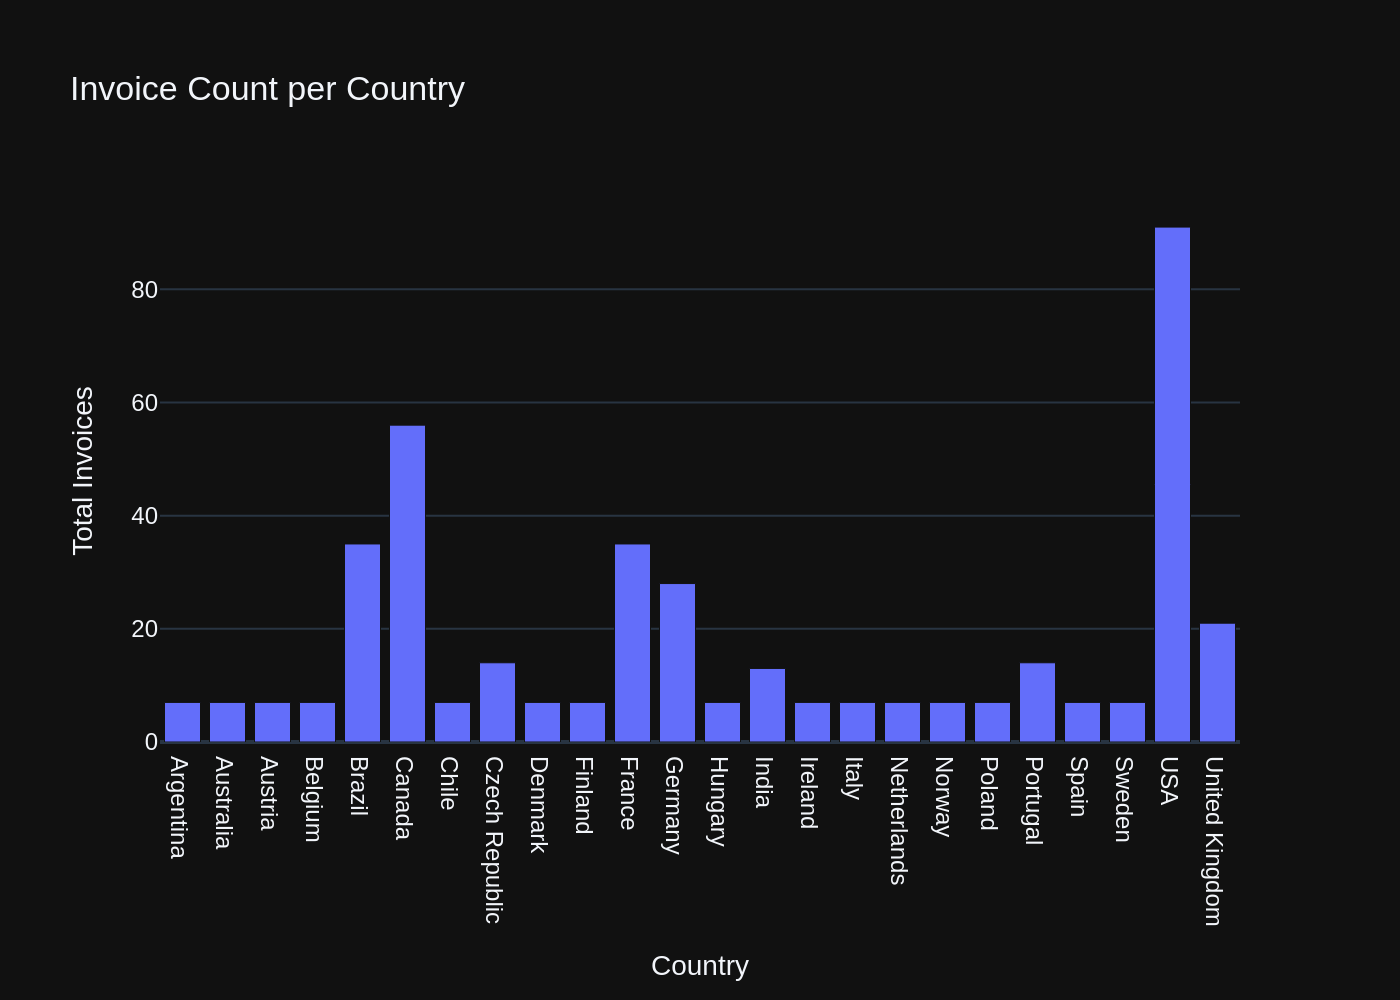

('SELECT BillingCountry, COUNT(InvoiceId) as TotalInvoices \nFROM invoices  \nGROUP BY BillingCountry',
     BillingCountry  TotalInvoices
 0        Argentina              7
 1        Australia              7
 2          Austria              7
 3          Belgium              7
 4           Brazil             35
 5           Canada             56
 6            Chile              7
 7   Czech Republic             14
 8          Denmark              7
 9          Finland              7
 10          France             35
 11         Germany             28
 12         Hungary              7
 13           India             13
 14         Ireland              7
 15           Italy              7
 16     Netherlands              7
 17          Norway              7
 18          Poland              7
 19        Portugal             14
 20           Spain              7
 21          Sweden              7
 22             USA             91
 23  United Kingdom             21,
 Figure({
     'data

In [23]:
question = """  
    Find the total number of invoices per country:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 7, updating n_results = 7
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r\n    FOREIGN KEY (InvoiceId) REFERENCES "invoices" (InvoiceId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n 

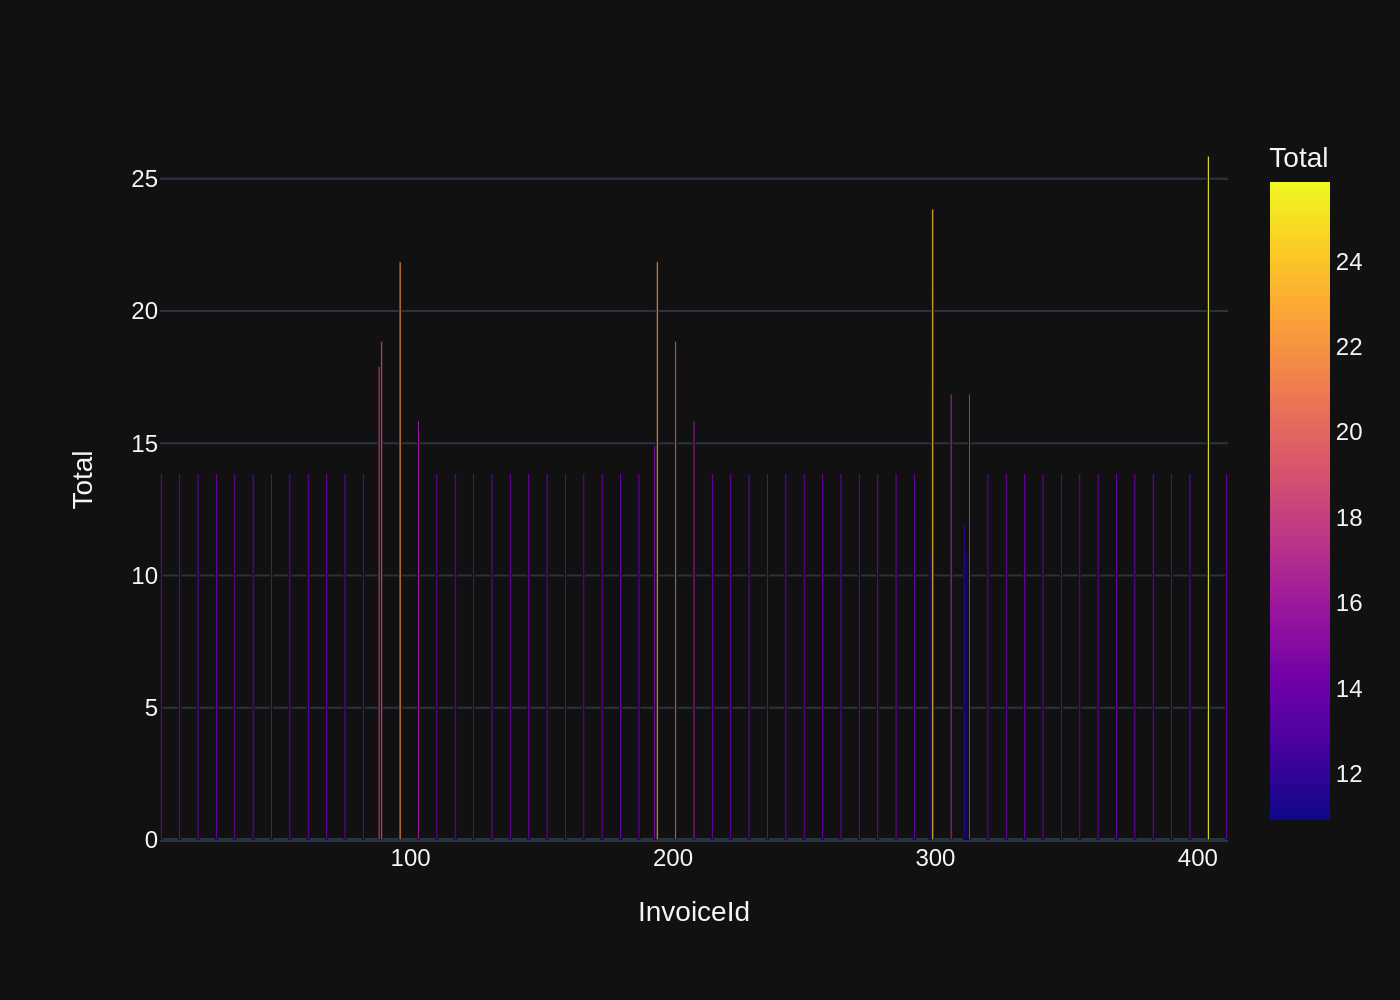

('SELECT * FROM invoices WHERE Total > 10.00',
     InvoiceId  CustomerId          InvoiceDate             BillingAddress  \
 0           5          23  2009-01-11 00:00:00            69 Salem Street   
 1          12           2  2009-02-11 00:00:00    Theodor-Heuss-Straße 34   
 2          19          40  2009-03-14 00:00:00             8, Rue Hanovre   
 3          26          19  2009-04-14 00:00:00            1 Infinite Loop   
 4          33          57  2009-05-15 00:00:00            Calle Lira, 198   
 ..        ...         ...                  ...                        ...   
 59        383          10  2013-08-12 00:00:00  Rua Dr. Falcão Filho, 155   
 60        390          48  2013-09-12 00:00:00      Lijnbaansgracht 120bg   
 61        397          27  2013-10-13 00:00:00            1033 N Park Ave   
 62        404           6  2013-11-13 00:00:00              Rilská 3174/6   
 63        411          44  2013-12-14 00:00:00            Porthaninkatu 9   
 
    BillingCity

In [24]:
question = """  
    List all invoices with a total exceeding $10:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 8, updating n_results = 8
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r

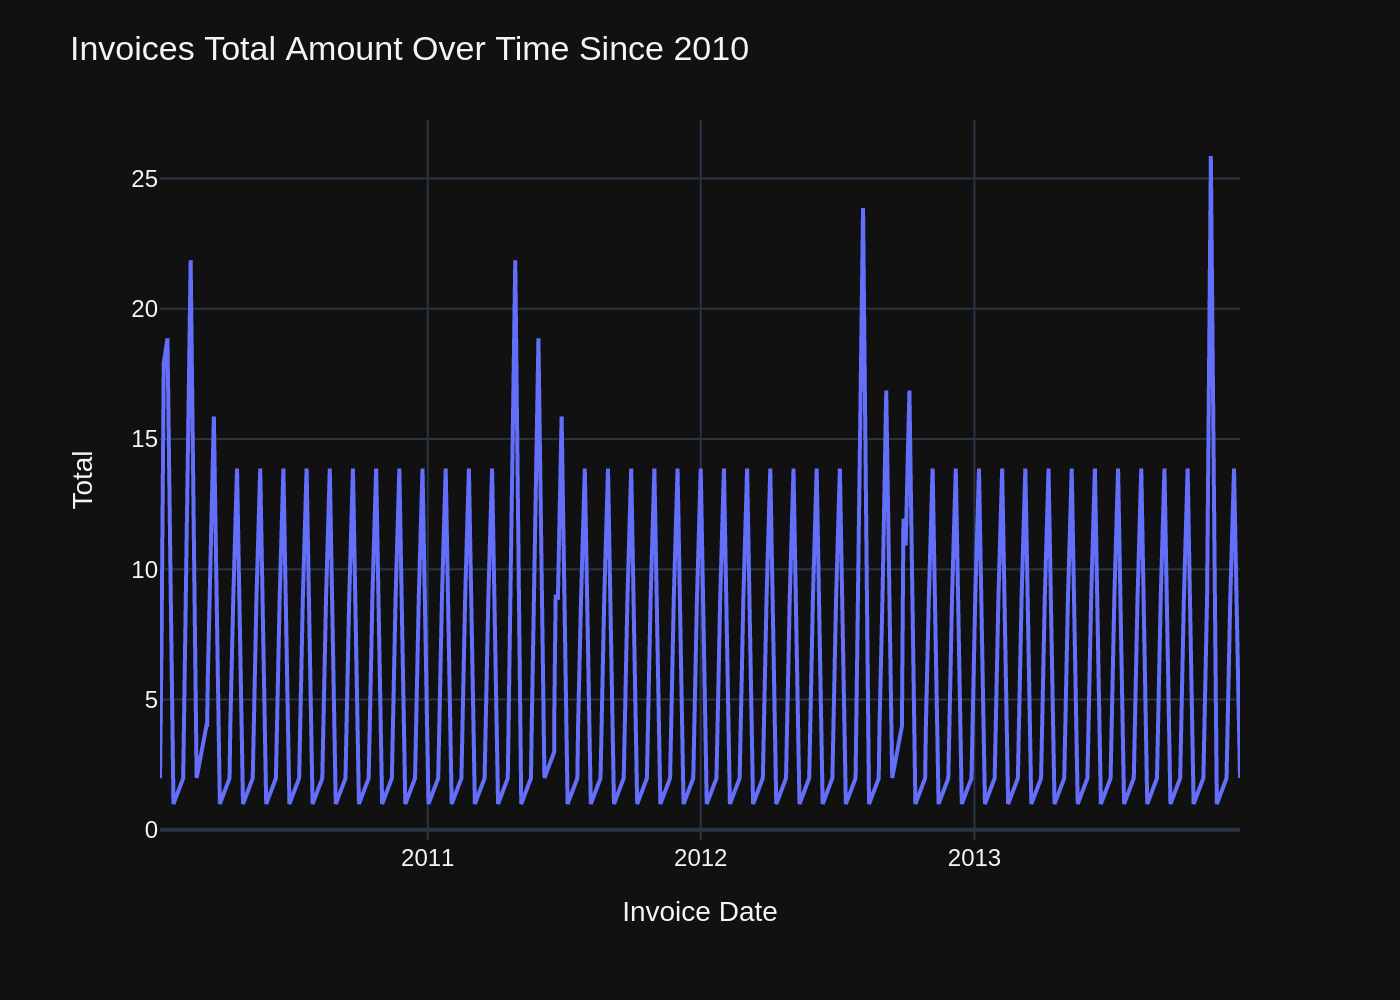

("SELECT InvoiceDate, Total \nFROM invoices  \nWHERE InvoiceDate >= '2010-01-01'\nGROUP BY InvoiceId",
              InvoiceDate  Total
 0    2010-01-08 00:00:00   1.98
 1    2010-01-08 00:00:00   1.98
 2    2010-01-09 00:00:00   3.96
 3    2010-01-10 00:00:00   6.94
 4    2010-01-13 00:00:00  17.91
 ..                   ...    ...
 324  2013-12-05 00:00:00   3.96
 325  2013-12-06 00:00:00   5.94
 326  2013-12-09 00:00:00   8.91
 327  2013-12-14 00:00:00  13.86
 328  2013-12-22 00:00:00   1.99
 
 [329 rows x 2 columns],
 Figure({
     'data': [{'hovertemplate': 'InvoiceDate=%{x}<br>Total=%{y}<extra></extra>',
               'legendgroup': '',
               'line': {'color': '#636efa', 'dash': 'solid'},
               'marker': {'symbol': 'circle'},
               'mode': 'lines',
               'name': '',
               'orientation': 'v',
               'showlegend': False,
               'type': 'scatter',
               'x': array(['2010-01-08 00:00:00', '2010-01-08 00:00:00', '20

In [25]:
question = """  
    Find all invoices since 2010 and the total amount invoiced:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 9, updating n_results = 9
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_EmployeeReportsTo ON "employees" (ReportsTo)\n\nCREATE TABLE "employees"\r\n(\r\n    EmployeeId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    FirstName NVARCHAR(20)  NOT NULL,\r\n    Title NVARCHAR(30),\r\n    ReportsTo INTEGER,\r\n    BirthDate DATETIME,\r\n    HireDate DATETIME,\r\n    Address NVARCHAR(70),\r\n    City NVARCHAR(40),\r\n    State NVARCHAR(40),\r\n    Country NVARCHAR(40),\r\n    PostalCode NVARCHAR(10),\r\n    Phone NVARCHAR(24),\r\n    Fax NVARCHAR(24),\r\n    Email NVARCHAR(60),\r\n    FOREIGN KEY (ReportsTo) REFERENCES "employees" (EmployeeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY 

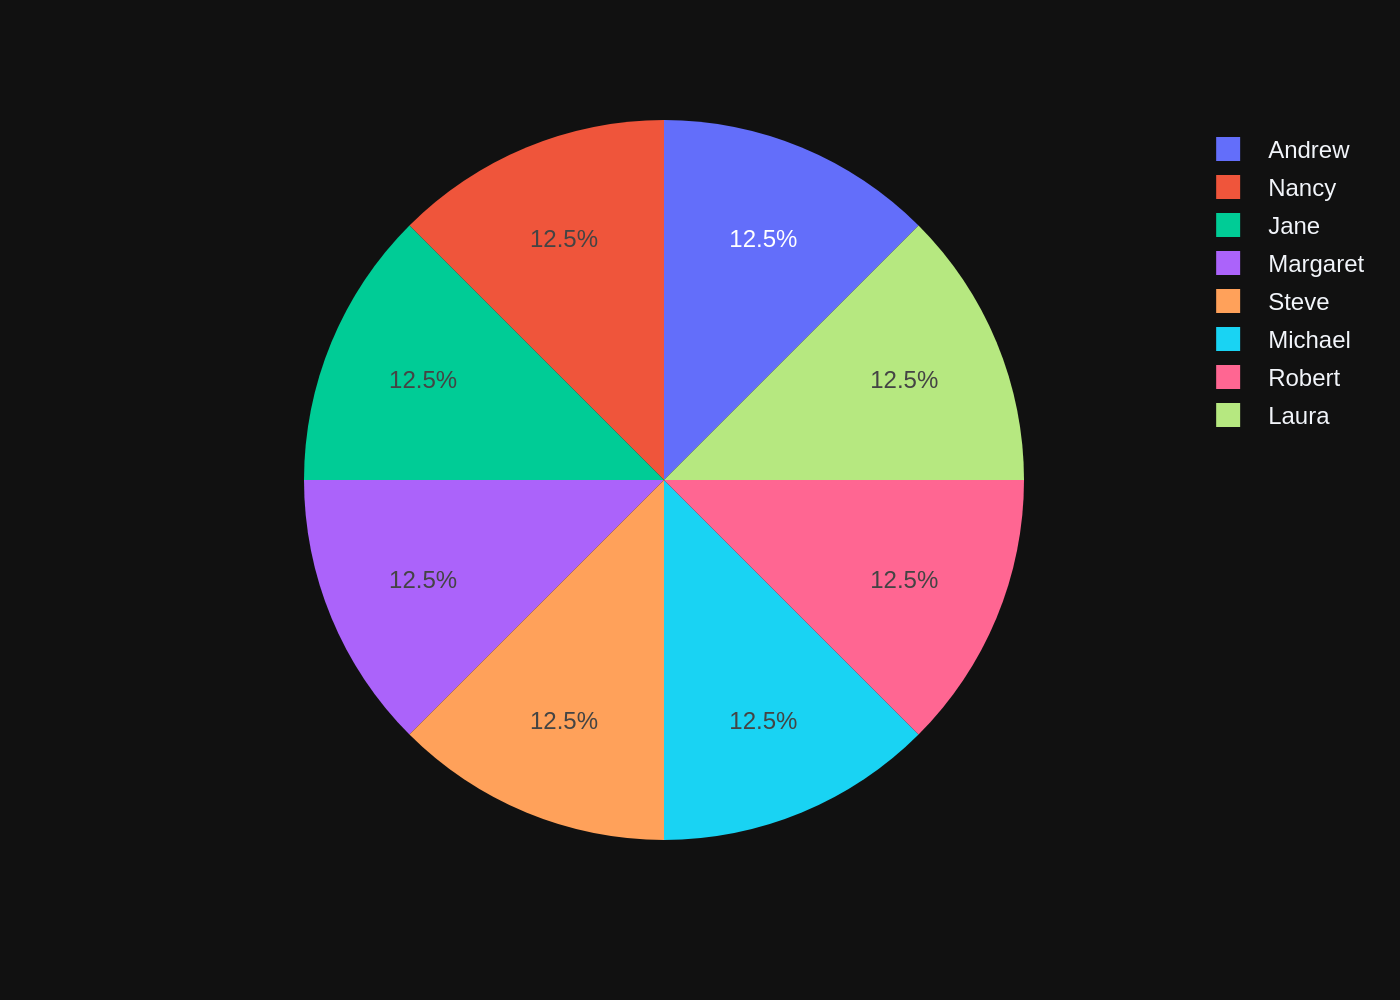

('SELECT e1.FirstName, e1.LastName, e2.FirstName AS ReportingManagerFirstName, e2.LastName AS ReportingManagerLastName \nFROM employees e1 \nLEFT JOIN employees e2 ON e1.ReportsTo = e2.EmployeeId',
   FirstName  LastName ReportingManagerFirstName ReportingManagerLastName
 0    Andrew     Adams                      None                     None
 1     Nancy   Edwards                    Andrew                    Adams
 2      Jane   Peacock                     Nancy                  Edwards
 3  Margaret      Park                     Nancy                  Edwards
 4     Steve   Johnson                     Nancy                  Edwards
 5   Michael  Mitchell                    Andrew                    Adams
 6    Robert      King                   Michael                 Mitchell
 7     Laura  Callahan                   Michael                 Mitchell,
 Figure({
     'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
               'hovertemplate': 'FirstName=%{label}<extra></extr

In [26]:
question = """  
    List all employees and their reporting manager's name (if any):
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Invo

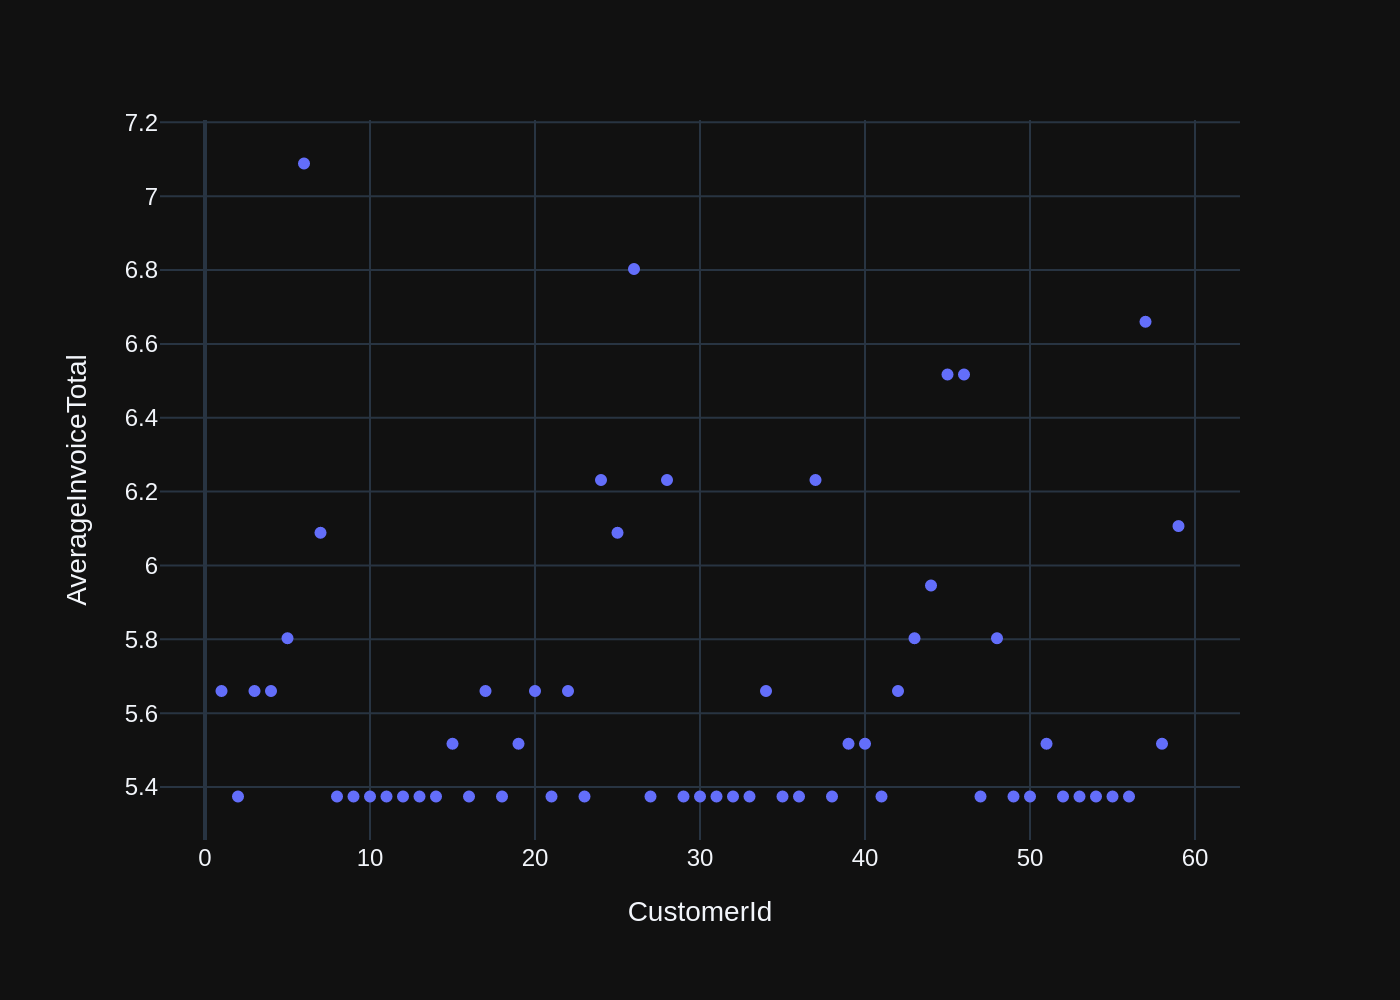

('SELECT CustomerId, AVG(Total) as AverageInvoiceTotal \nFROM invoices  \nGROUP BY CustomerId',
     CustomerId  AverageInvoiceTotal
 0            1             5.660000
 1            2             5.374286
 2            3             5.660000
 3            4             5.660000
 4            5             5.802857
 5            6             7.088571
 6            7             6.088571
 7            8             5.374286
 8            9             5.374286
 9           10             5.374286
 10          11             5.374286
 11          12             5.374286
 12          13             5.374286
 13          14             5.374286
 14          15             5.517143
 15          16             5.374286
 16          17             5.660000
 17          18             5.374286
 18          19             5.517143
 19          20             5.660000
 20          21             5.374286
 21          22             5.660000
 22          23             5.374286
 23          24 

In [27]:
question = """  
    Get the average invoice total for each customer:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_TrackAlbumId ON "tracks" (AlbumId)\n\nCREATE INDE

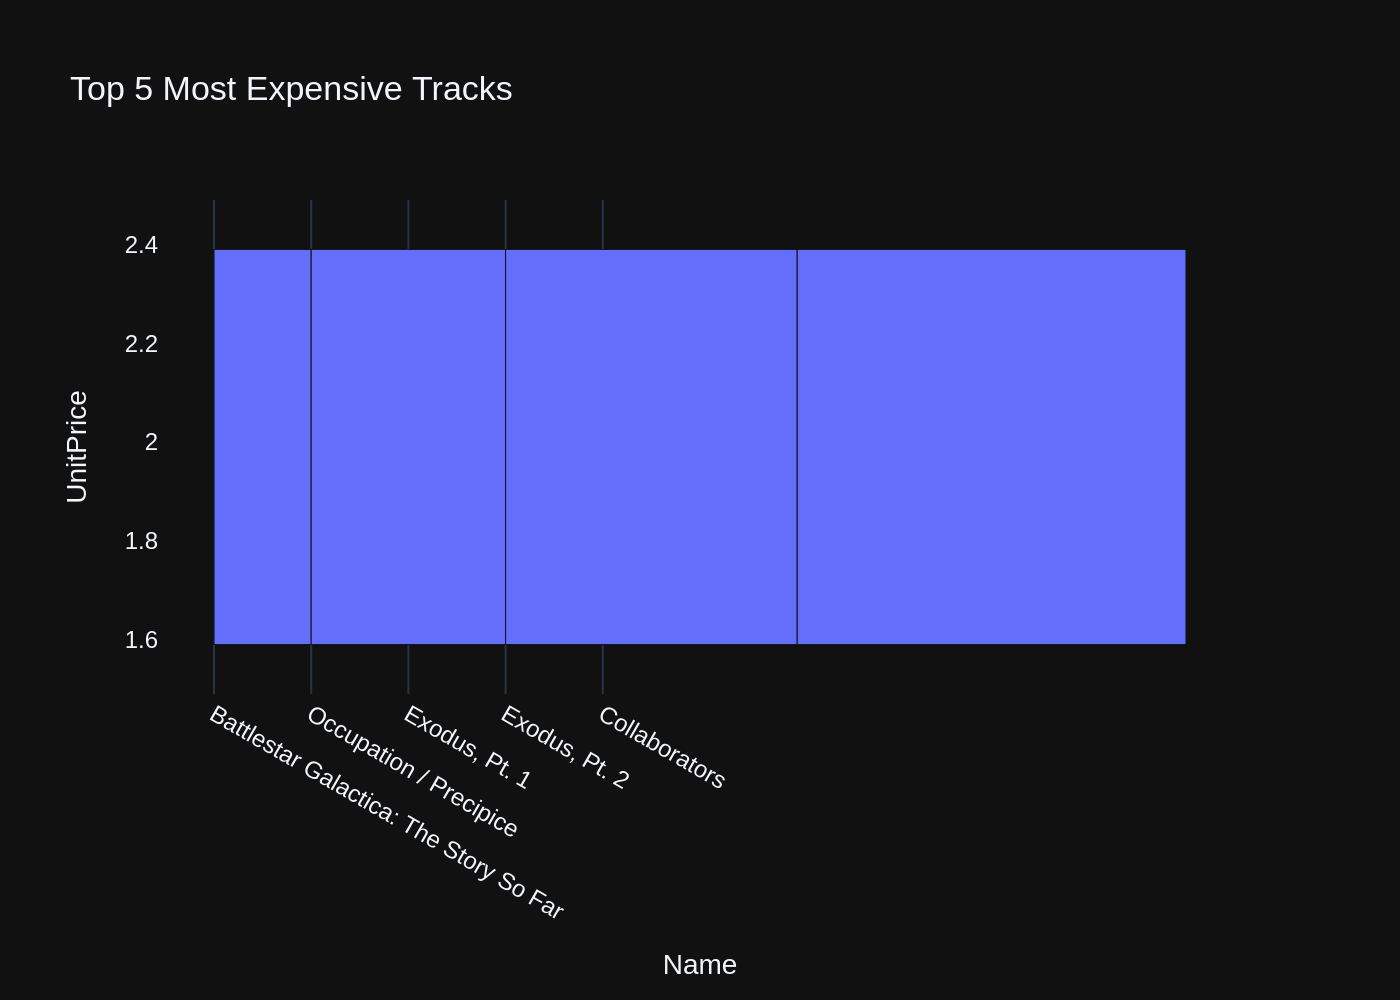

('SELECT Name, UnitPrice FROM tracks ORDER BY UnitPrice DESC LIMIT 5',
                                      Name  UnitPrice
 0  Battlestar Galactica: The Story So Far       1.99
 1                  Occupation / Precipice       1.99
 2                           Exodus, Pt. 1       1.99
 3                           Exodus, Pt. 2       1.99
 4                           Collaborators       1.99,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Name=%{x}<br>UnitPrice=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'h',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['Battlestar Galactica: The Story So Far', 'Occupation / Precipice',
                           'Exodus, Pt. 1', 'Exodus, Pt. 2', 'Collaborat

In [28]:
question = """  
    Find the top 5 most expensive tracks (based on unit price):
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_TrackGenreId ON "tracks" (GenreId)\n\nCREATE TABL

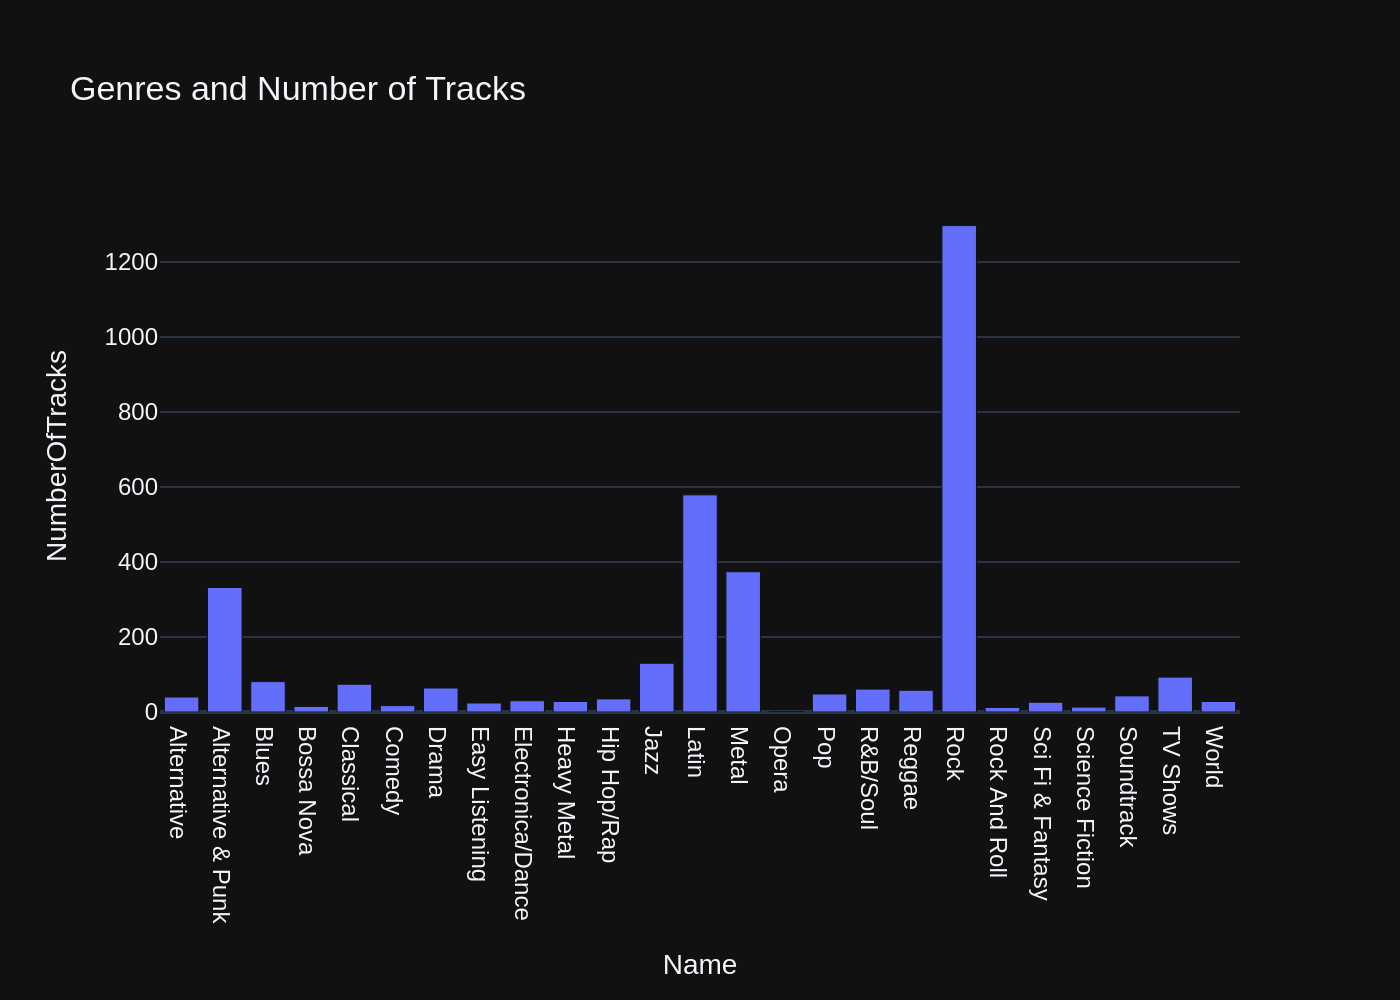

('SELECT g.Name, COUNT(t.GenreId) as NumberOfTracks \nFROM genres g \nJOIN tracks t ON g.GenreId = t.GenreId \nGROUP BY g.Name',
                   Name  NumberOfTracks
 0          Alternative              40
 1   Alternative & Punk             332
 2                Blues              81
 3           Bossa Nova              15
 4            Classical              74
 5               Comedy              17
 6                Drama              64
 7       Easy Listening              24
 8    Electronica/Dance              30
 9          Heavy Metal              28
 10         Hip Hop/Rap              35
 11                Jazz             130
 12               Latin             579
 13               Metal             374
 14               Opera               1
 15                 Pop              48
 16            R&B/Soul              61
 17              Reggae              58
 18                Rock            1297
 19       Rock And Roll              12
 20    Sci Fi & Fantasy        

In [29]:
question = """  
    List all genres and the number of tracks in each genre:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON "tracks" (GenreId)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDE

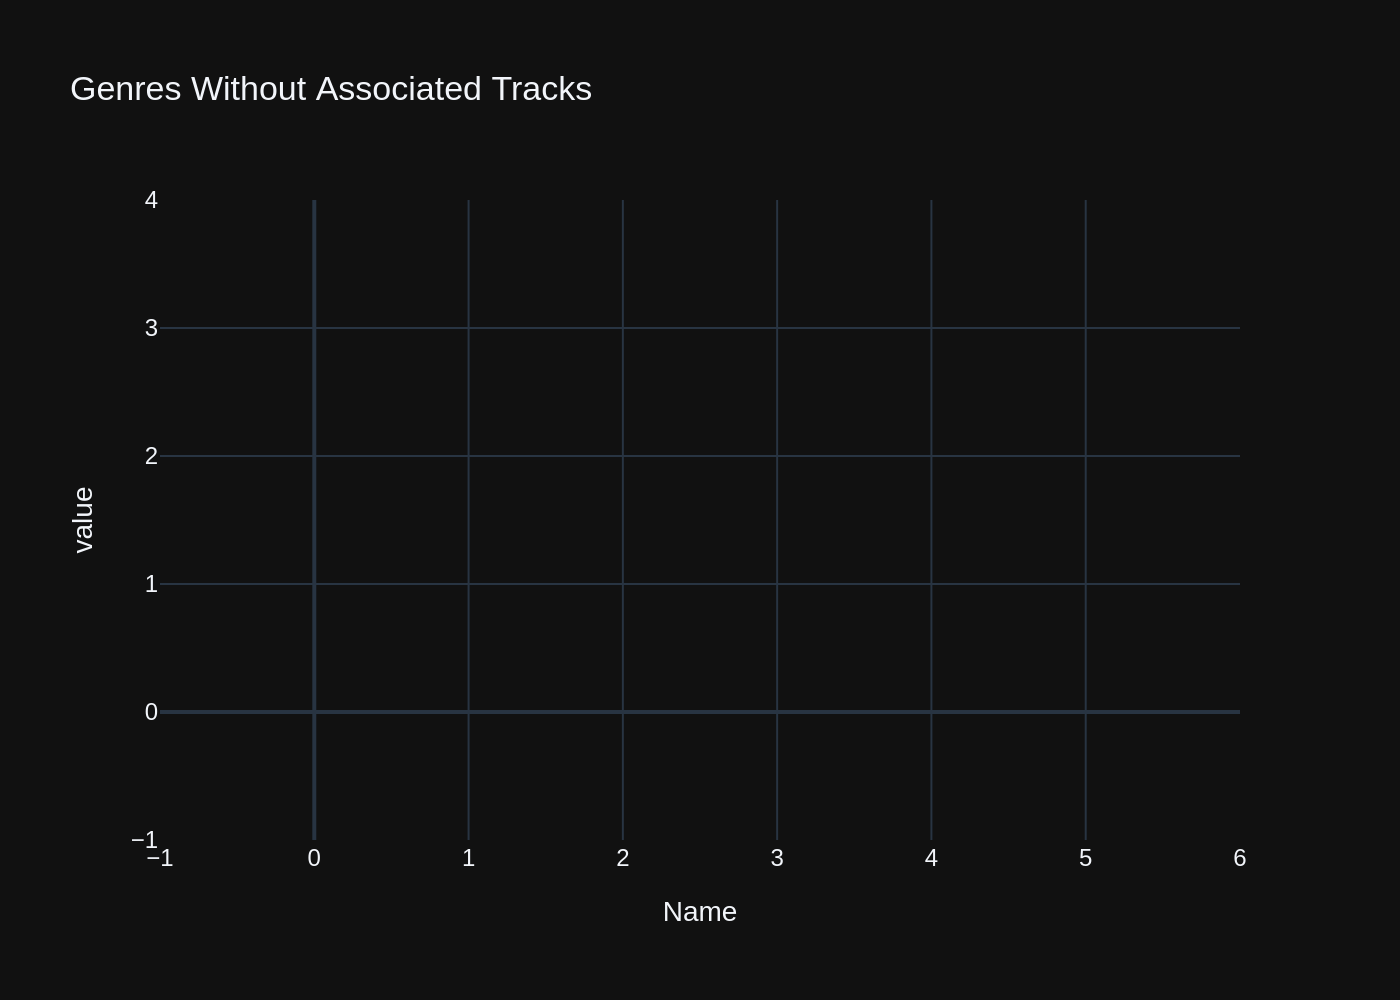

('SELECT g.Name FROM genres g LEFT JOIN tracks t ON g.GenreId = t.GenreId WHERE t.GenreId IS NULL',
 Empty DataFrame
 Columns: [Name]
 Index: [],
 Figure({
     'data': [],
     'layout': {'barmode': 'relative',
                'legend': {'tracegroupgap': 0},
                'template': '...',
                'title': {'text': 'Genres Without Associated Tracks'},
                'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Name'}},
                'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
 }))

In [30]:
question = """  
    Get all genres that do not have any tracks associated with them:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    Company NVARCHAR(80),\r\n    Address NVARCHAR(70),\r\n    City NVAR

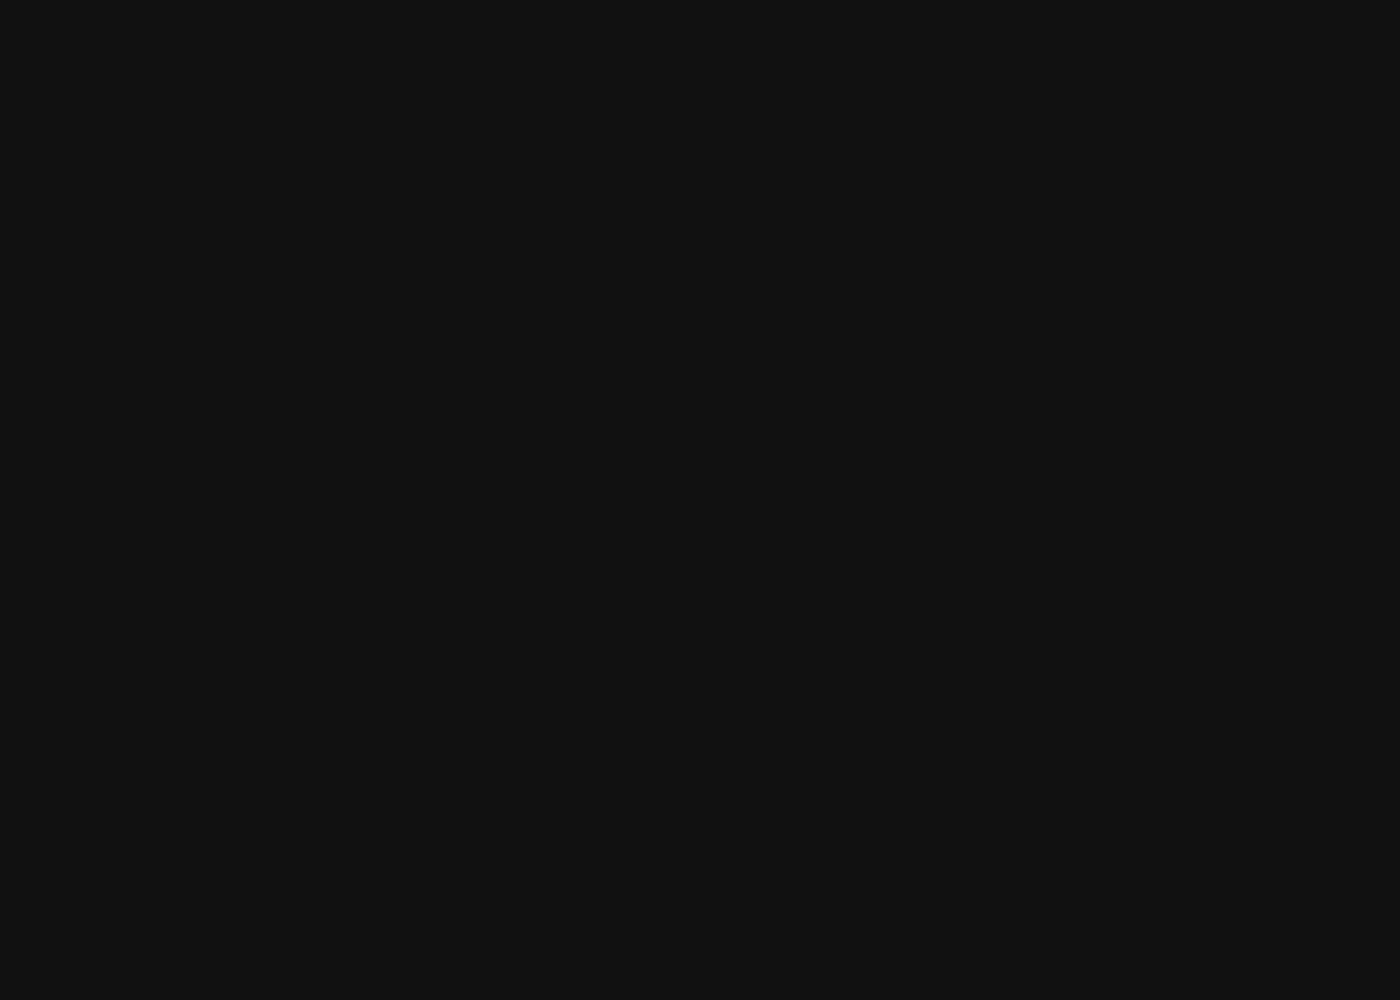

('SELECT c.* \nFROM customers c LEFT JOIN invoices i ON c.CustomerId = i.CustomerId WHERE i.InvoiceId IS NULL',
 Empty DataFrame
 Columns: [CustomerId, FirstName, LastName, Company, Address, City, State, Country, PostalCode, Phone, Fax, Email, SupportRepId]
 Index: [],
 Figure({
     'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
               'hovertemplate': 'CustomerId=%{label}<extra></extra>',
               'labels': array([], dtype=object),
               'legendgroup': '',
               'name': '',
               'showlegend': True,
               'type': 'pie'}],
     'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
 }))

In [31]:
question = """  
    List all customers who have not placed any orders:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "albums"\r\n(\r\n    AlbumId INTEGER PRIMARY KEY AUTO

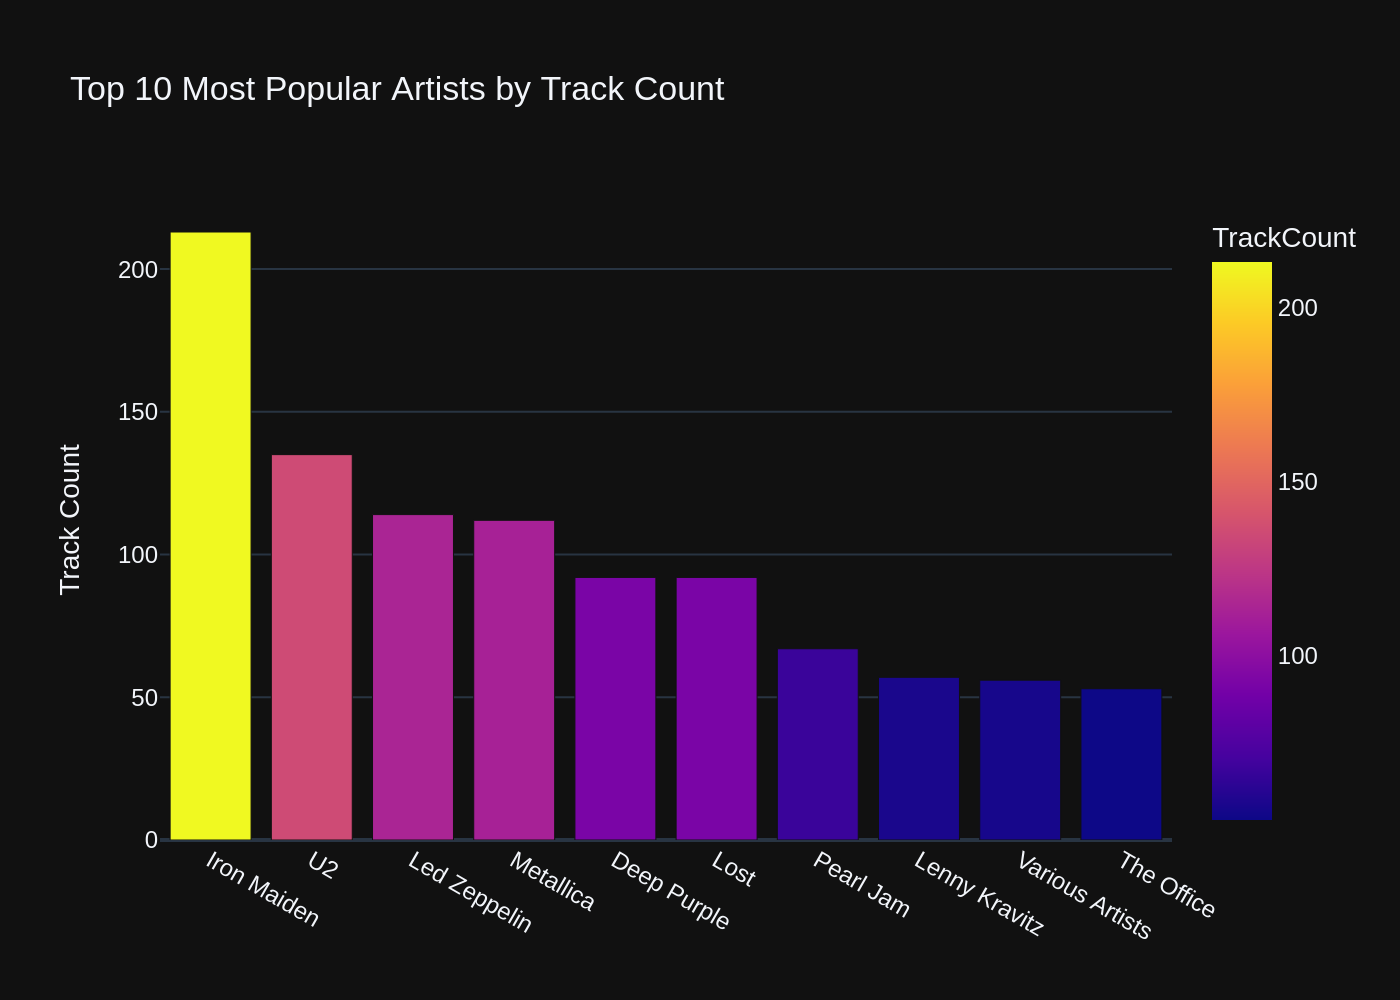

('SELECT ar.Name, COUNT(t.TrackId) as TrackCount FROM artists ar \nJOIN albums a ON ar.ArtistId = a.ArtistId \nJOIN tracks t ON a.AlbumId = t.AlbumId  \nGROUP BY ar.ArtistId \nORDER BY TrackCount DESC LIMIT 10',
               Name  TrackCount
 0      Iron Maiden         213
 1               U2         135
 2     Led Zeppelin         114
 3        Metallica         112
 4      Deep Purple          92
 5             Lost          92
 6        Pearl Jam          67
 7    Lenny Kravitz          57
 8  Various Artists          56
 9       The Office          53,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Name=%{x}<br>TrackCount=%{marker.color}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': array([213, 135, 114, 112,  92,  92,  67,  57,  56,  53]),
                          'coloraxis': 'coloraxis',
                          'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',


In [32]:
question = """ 
    There are 3 tables: artists, albums and tracks, where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    Can you find the top 10 most popular artists based on the number of tracks
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_CustomerSupportRepId ON "customers" (SupportRepId)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    Company NVARCHAR(80),\r\n    Address NVARCHAR(70),\r\n    City NVARCHAR(40),\r\n    State NVARCHAR(40),\r\n    Country NVARCHAR(40),\r\n    PostalCode NVARCHAR(10),\r\n    Phone NVARCHAR(24),\r\n    Fax NVARCHAR(24),\r\n    Email NVARCHAR(60)  NOT NULL,\r\n    SupportRepId INTEGER,\r\n    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n

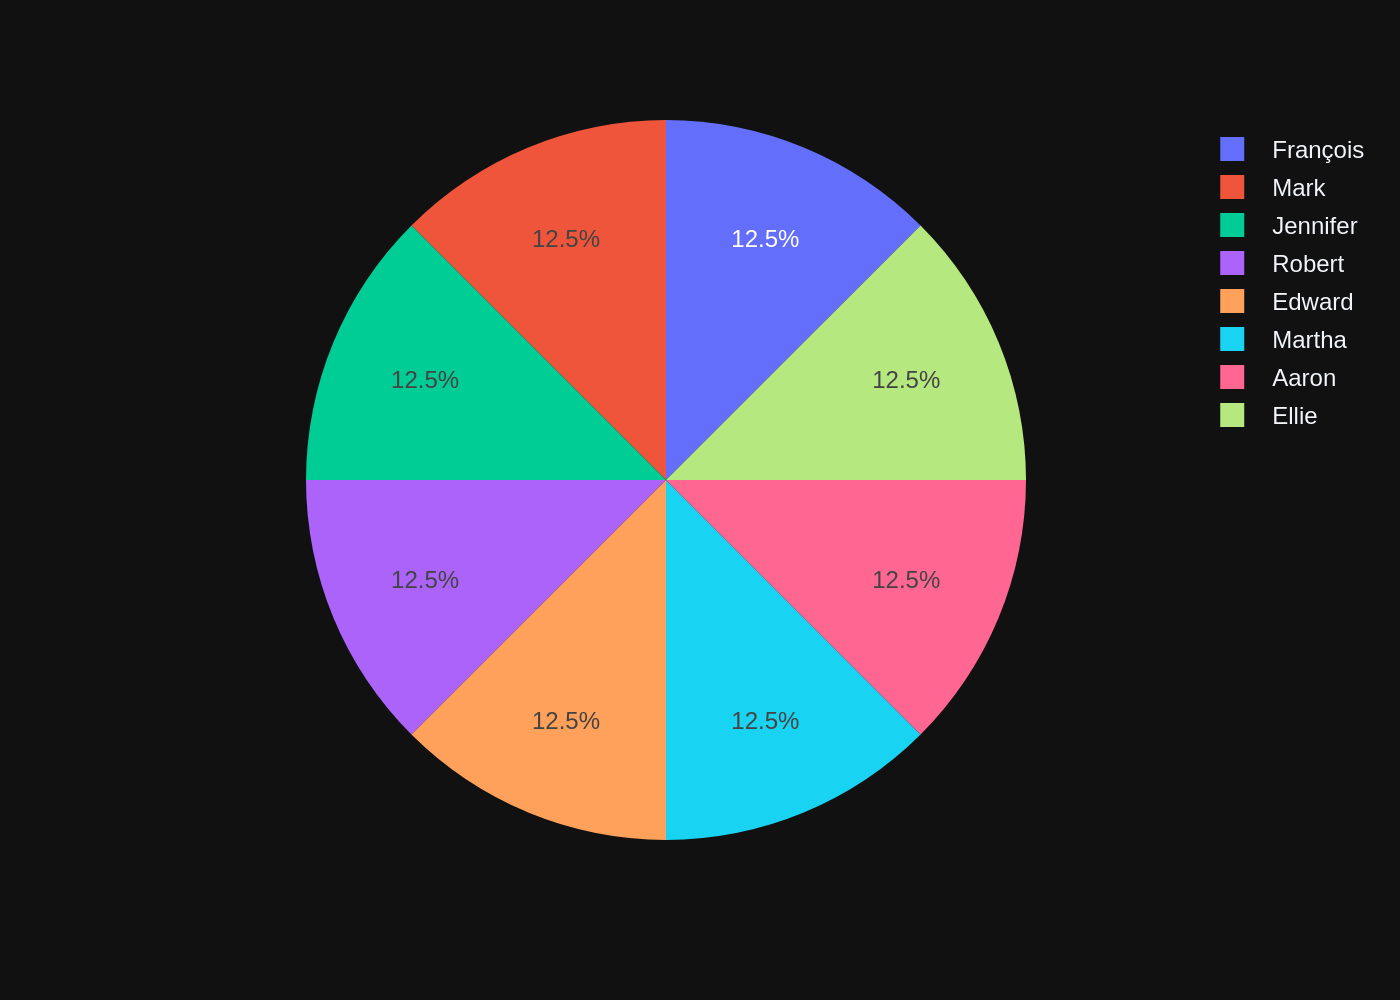

("SELECT FirstName, LastName, Email FROM customers WHERE Country = 'Canada'",
   FirstName  LastName                   Email
 0  François  Tremblay     ftremblay@gmail.com
 1      Mark   Philips      mphilips12@shaw.ca
 2  Jennifer  Peterson     jenniferp@rogers.ca
 3    Robert     Brown        robbrown@shaw.ca
 4    Edward   Francis     edfrancis@yachoo.ca
 5    Martha      Silk    marthasilk@gmail.com
 6     Aaron  Mitchell  aaronmitchell@yahoo.ca
 7     Ellie  Sullivan  ellie.sullivan@shaw.ca,
 Figure({
     'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
               'hovertemplate': 'FirstName=%{label}<extra></extra>',
               'labels': array(['François', 'Mark', 'Jennifer', 'Robert', 'Edward', 'Martha', 'Aaron',
                                'Ellie'], dtype=object),
               'legendgroup': '',
               'name': '',
               'showlegend': True,
               'type': 'pie'}],
     'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, '

In [33]:
question = """  
     List all customers from Canada and their email addresses:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Invo

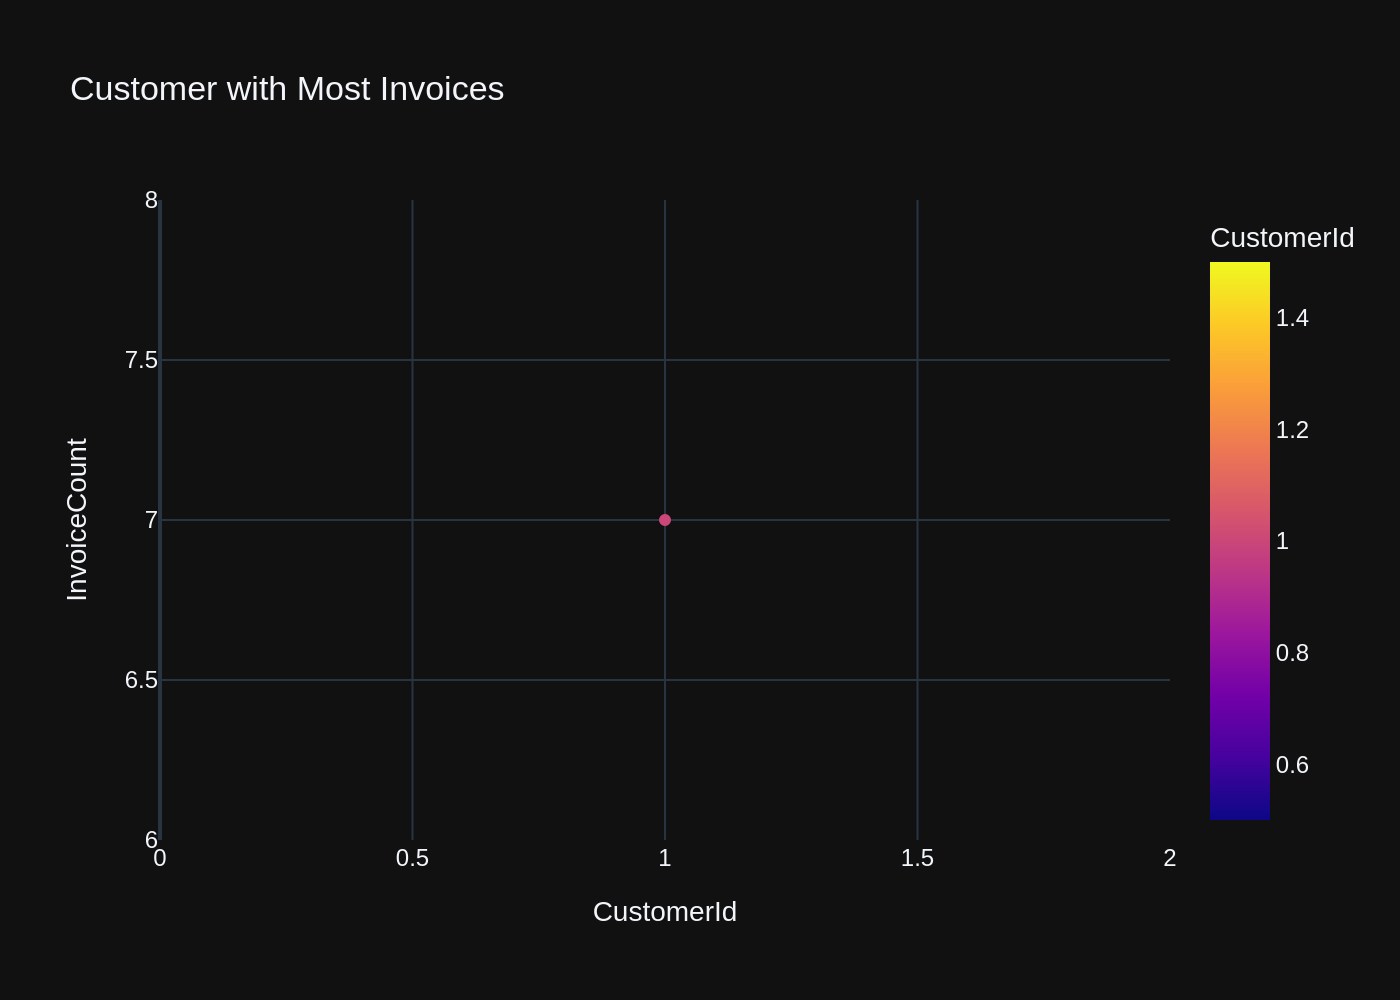

('SELECT CustomerId, COUNT(InvoiceId) as InvoiceCount  \nFROM invoices \nGROUP BY CustomerId \nORDER BY InvoiceCount DESC \nLIMIT 1',
    CustomerId  InvoiceCount
 0           1             7,
 Figure({
     'data': [{'hovertemplate': 'CustomerId=%{marker.color}<br>InvoiceCount=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': array([1]), 'coloraxis': 'coloraxis', 'symbol': 'circle'},
               'mode': 'markers',
               'name': '',
               'orientation': 'v',
               'showlegend': False,
               'type': 'scatter',
               'x': array([1]),
               'xaxis': 'x',
               'y': array([7]),
               'yaxis': 'y'}],
     'layout': {'coloraxis': {'colorbar': {'title': {'text': 'CustomerId'}},
                              'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                             '#46039f'], [0.2222222222222222,
                                          

In [34]:
question = """  
     Find the customer with the most invoices 
"""

vn.ask(question=question)

### Advanced SQL questions

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRI

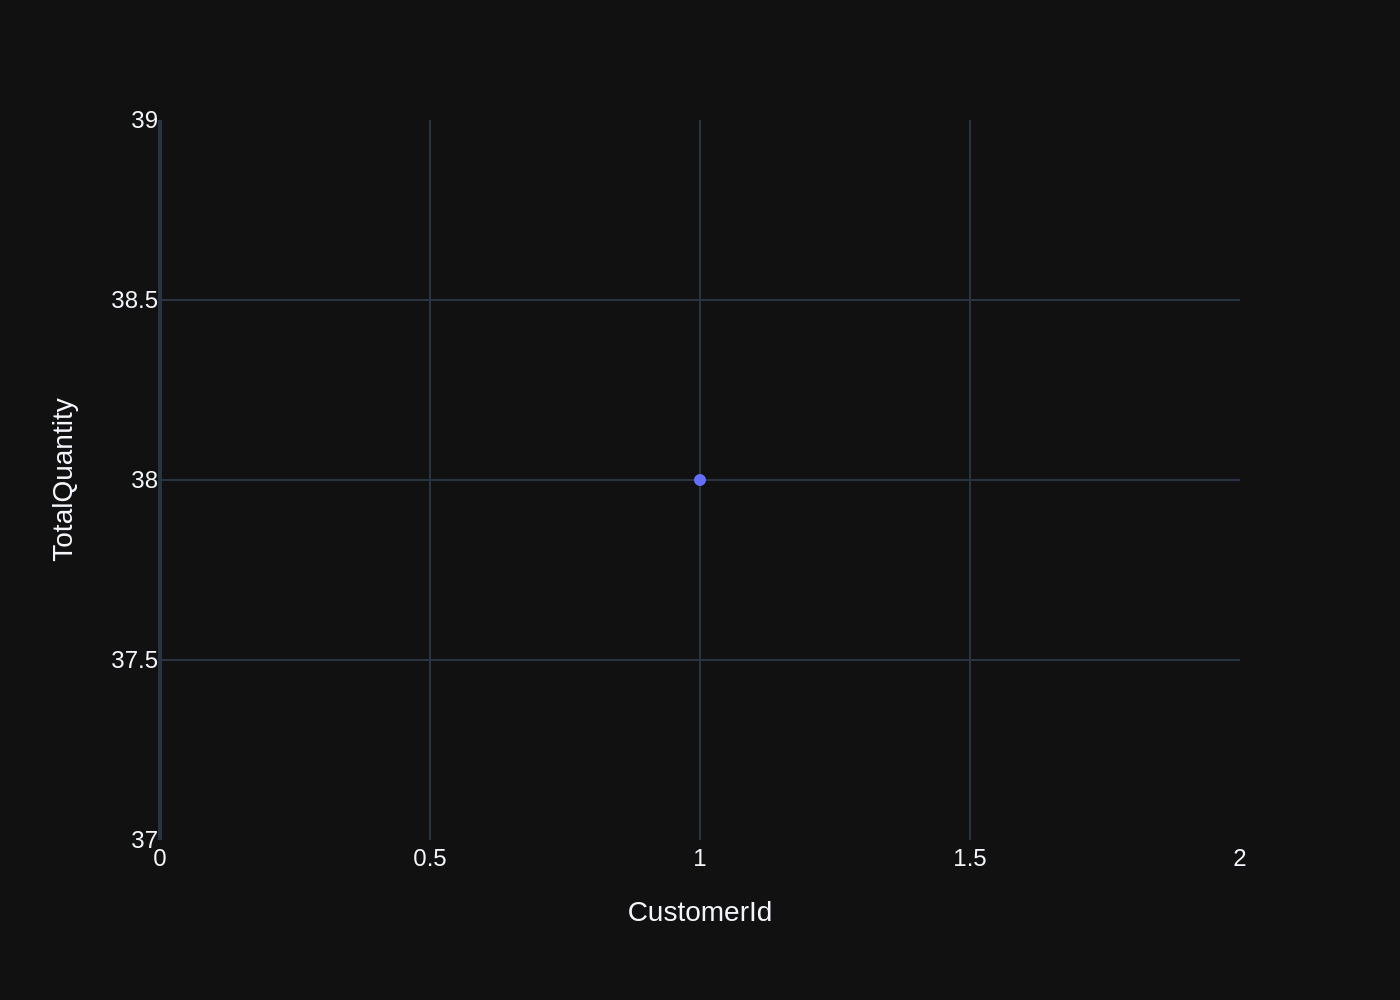

('SELECT i.CustomerId, SUM(ii.Quantity) as TotalQuantity FROM invoices i \nJOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId \nJOIN tracks t ON ii.TrackId = t.TrackId \nGROUP BY i.CustomerId \nORDER BY TotalQuantity DESC LIMIT 1',
    CustomerId  TotalQuantity
 0           1             38,
 Figure({
     'data': [{'hovertemplate': 'CustomerId=%{x}<br>TotalQuantity=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'symbol': 'circle'},
               'mode': 'markers',
               'name': '',
               'orientation': 'v',
               'showlegend': False,
               'type': 'scatter',
               'x': array([1]),
               'xaxis': 'x',
               'y': array([38]),
               'yaxis': 'y'}],
     'layout': {'legend': {'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...',
                'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'CustomerId'}},

In [35]:
question = """  
     Find the customer who bought the most albums in total quantity (across all invoices): 
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r\n    FOREIGN KEY (InvoiceId) REFERENCES "invoices" (InvoiceId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,

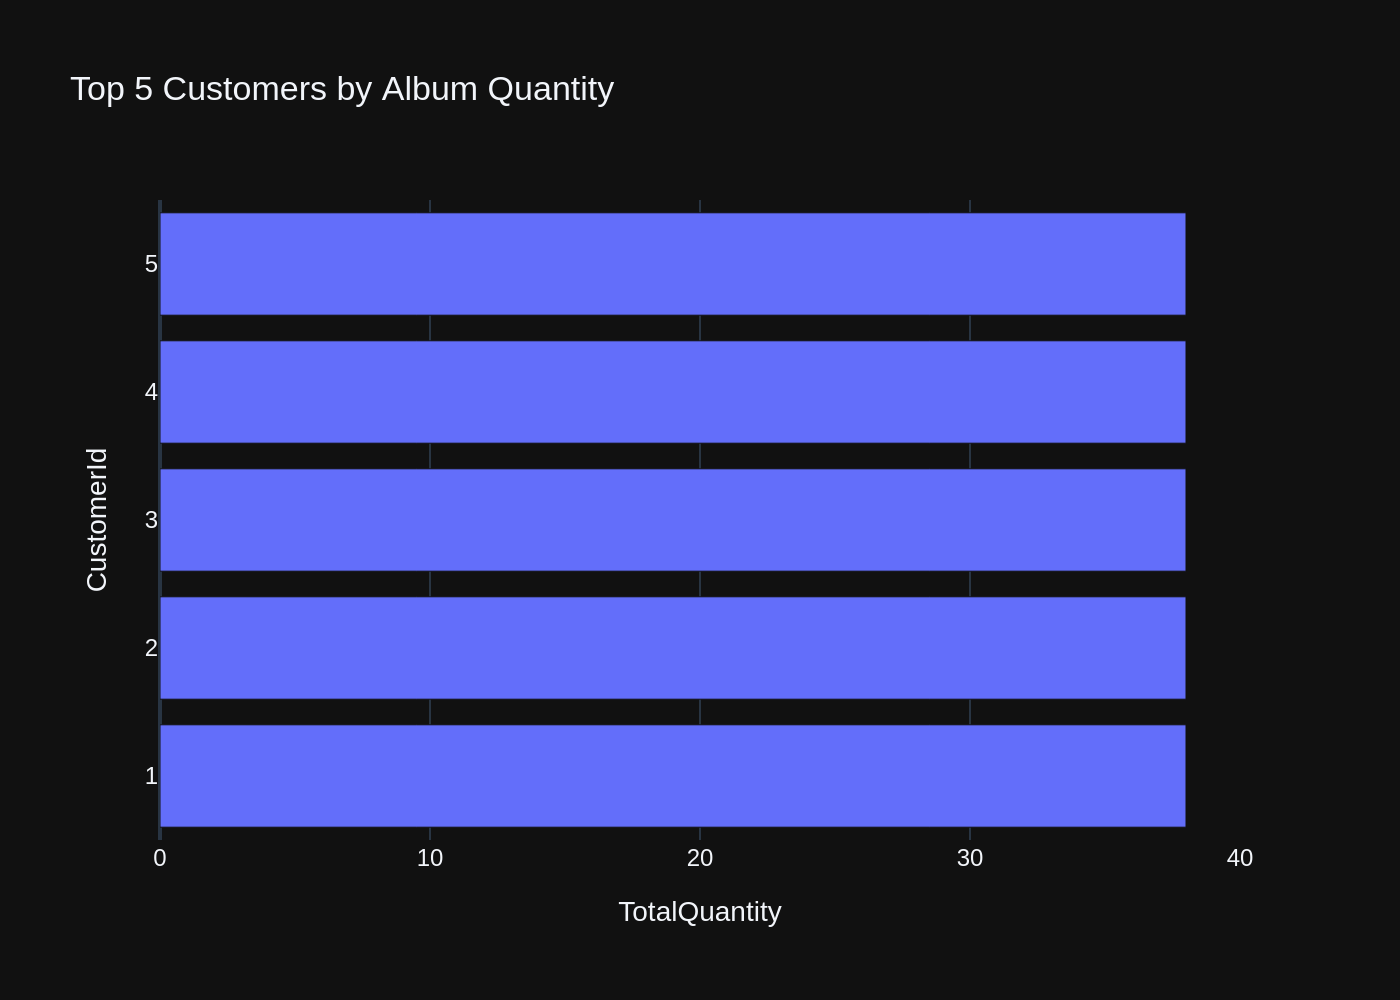

('SELECT i.CustomerId, SUM(ii.Quantity) as TotalQuantity FROM invoices i \nJOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId \nGROUP BY i.CustomerId  \nORDER BY TotalQuantity DESC LIMIT 5',
    CustomerId  TotalQuantity
 0           1             38
 1           2             38
 2           3             38
 3           4             38
 4           5             38,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'TotalQuantity=%{x}<br>CustomerId=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'h',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array([38, 38, 38, 38, 38]),
               'xaxis': 'x',
               'y': array([1, 2, 3, 4, 5]),
               'yaxis': 'y'}],
     'layout': {'barmode': 

In [36]:
question = """  
    Hint: album quantity is found in invoice_items, 
    
    Find the top 5 customers who bought the most albums in total quantity (across all invoices):
"""

vn.ask(question=question)

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r

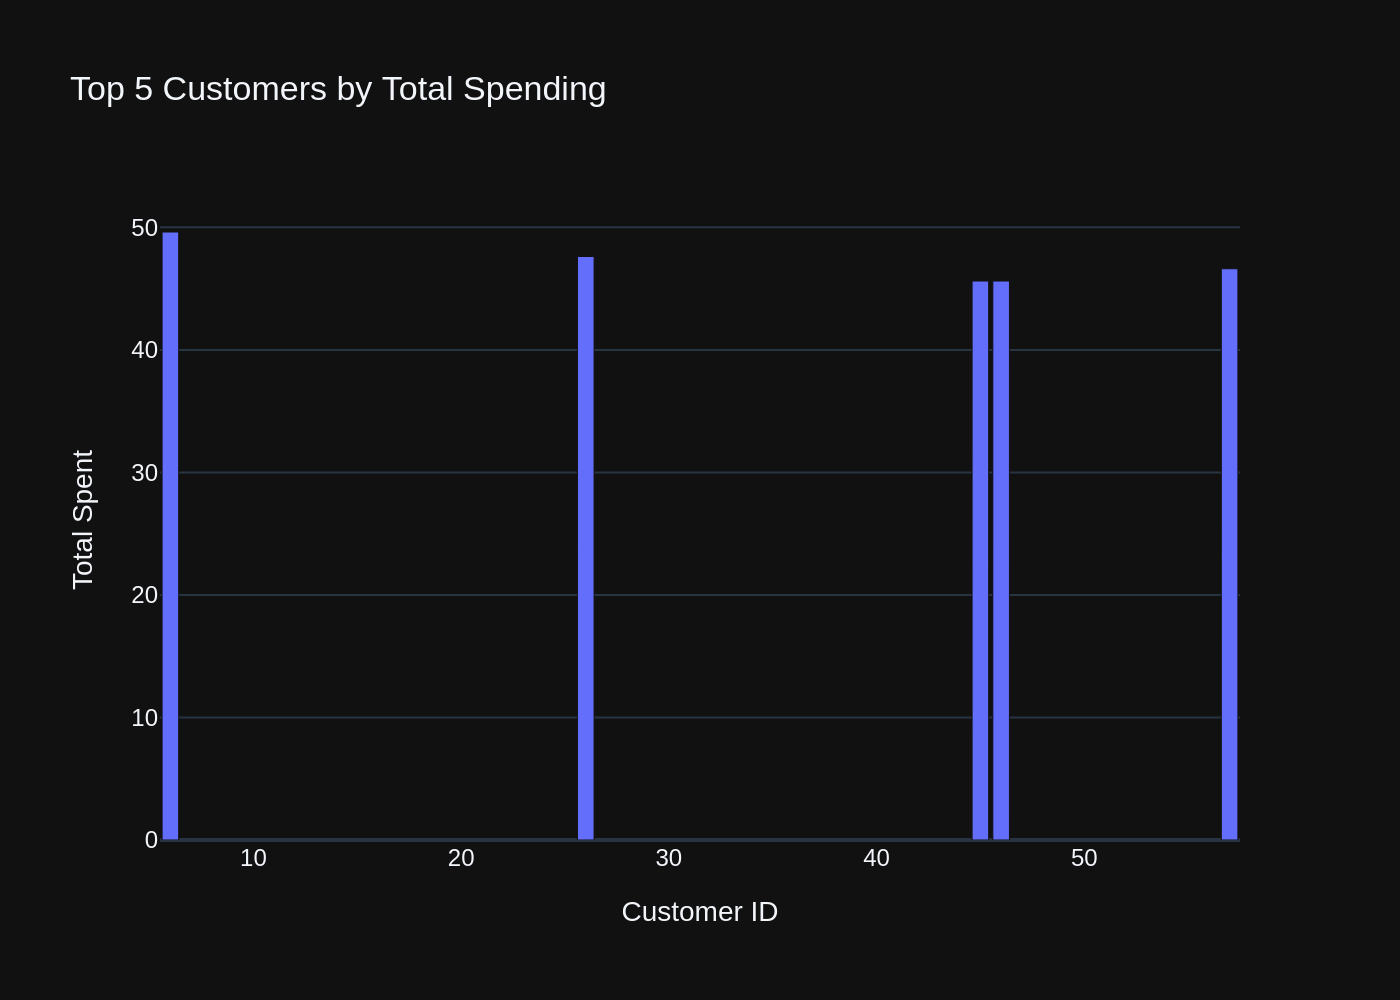

('SELECT CustomerId, SUM(Total) as TotalSpent FROM invoices  \nGROUP BY CustomerId \nORDER BY TotalSpent DESC LIMIT 5',
    CustomerId  TotalSpent
 0           6       49.62
 1          26       47.62
 2          57       46.62
 3          45       45.62
 4          46       45.62,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'CustomerId=%{x}<br>TotalSpent=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array([ 6, 26, 57, 45, 46]),
               'xaxis': 'x',
               'y': array([49.62, 47.62, 46.62, 45.62, 45.62]),
               'yaxis': 'y'}],
     'layout': {'barmode': 'relative',
                'legend': {'tracegroupgap': 0},
             

In [37]:
question = """  
     Find the top 5 customers who spent the most money overall, 
     
     Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_PlaylistTrackTrackId ON "playlist_track" (TrackId)\n\nCREATE TABLE "playlists"\r\n(\r\n    PlaylistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "playlist_track"\r\n(\r\n    PlaylistId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    CONSTRAINT PK_PlaylistTrack PRIMARY KEY  (PlaylistId, TrackId),\r\n    FOREIGN KEY (PlaylistId) REFERENCES "playlists" (PlaylistId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\

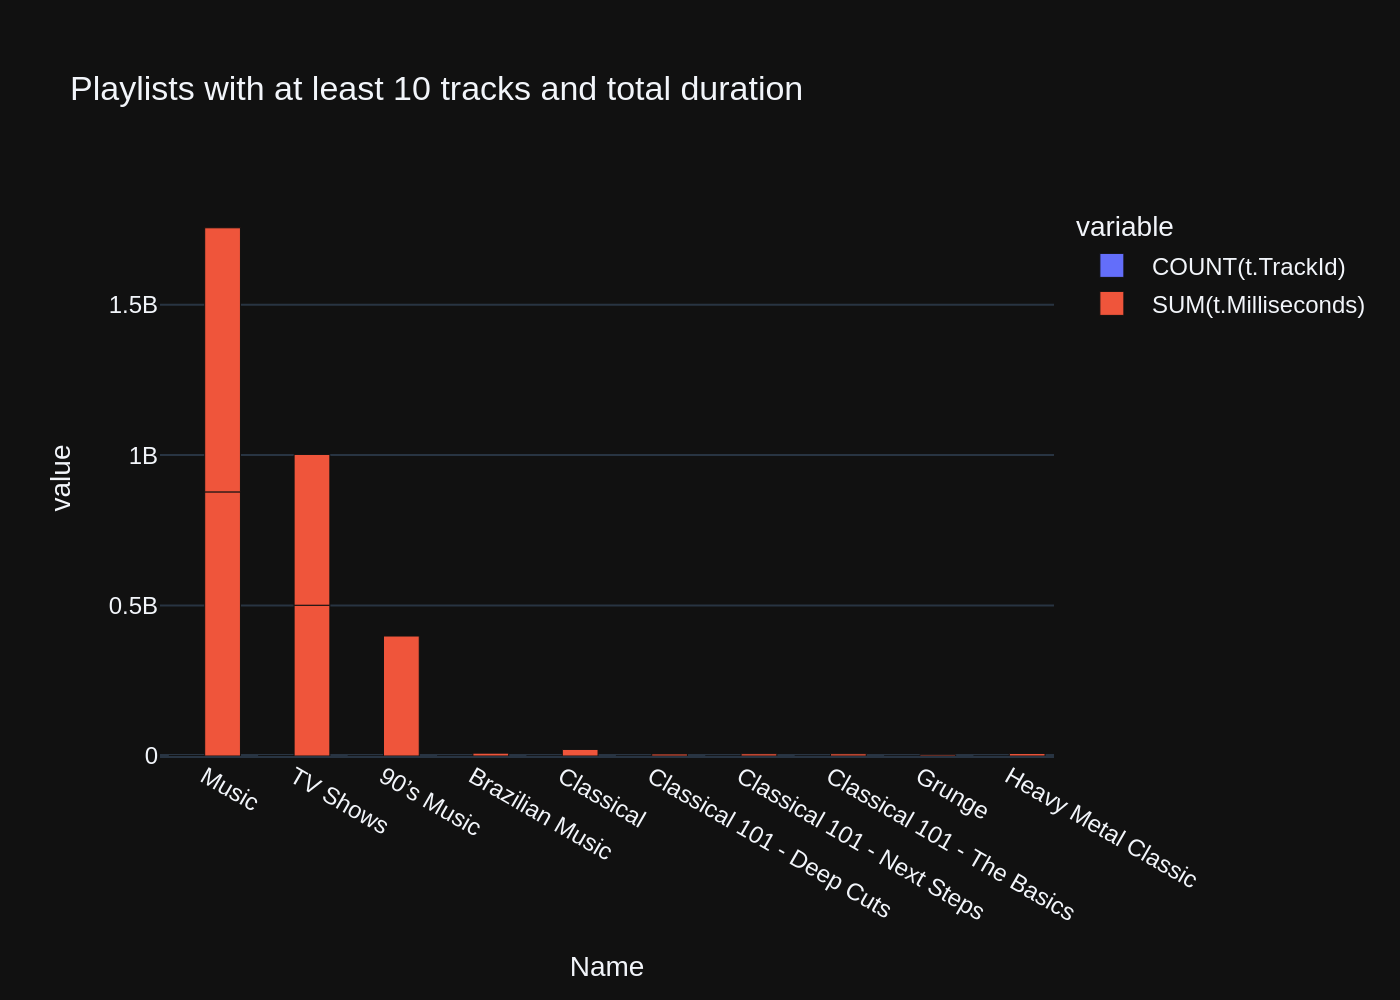

('SELECT p.Name, COUNT(t.TrackId), SUM(t.Milliseconds) FROM playlists p \nJOIN playlist_track pt ON p.PlaylistId = pt.PlaylistId \nJOIN tracks t ON pt.TrackId = t.TrackId  \nGROUP BY p.PlaylistId \nHAVING COUNT(pt.TrackId) >= 10',
                           Name  COUNT(t.TrackId)  SUM(t.Milliseconds)
 0                        Music              3290            877683083
 1                     TV Shows               213            501094957
 2                   90’s Music              1477            398705153
 3                        Music              3290            877683083
 4                     TV Shows               213            501094957
 5              Brazilian Music                39              9486559
 6                    Classical                75             21770592
 7    Classical 101 - Deep Cuts                25              6755730
 8   Classical 101 - Next Steps                25              7575051
 9   Classical 101 - The Basics                25          

In [38]:
question = """  
     Get all playlists containing at least 10 tracks and the total duration of those tracks:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_AlbumArtistId ON "albums" (ArtistId)\n\nCREATE IN

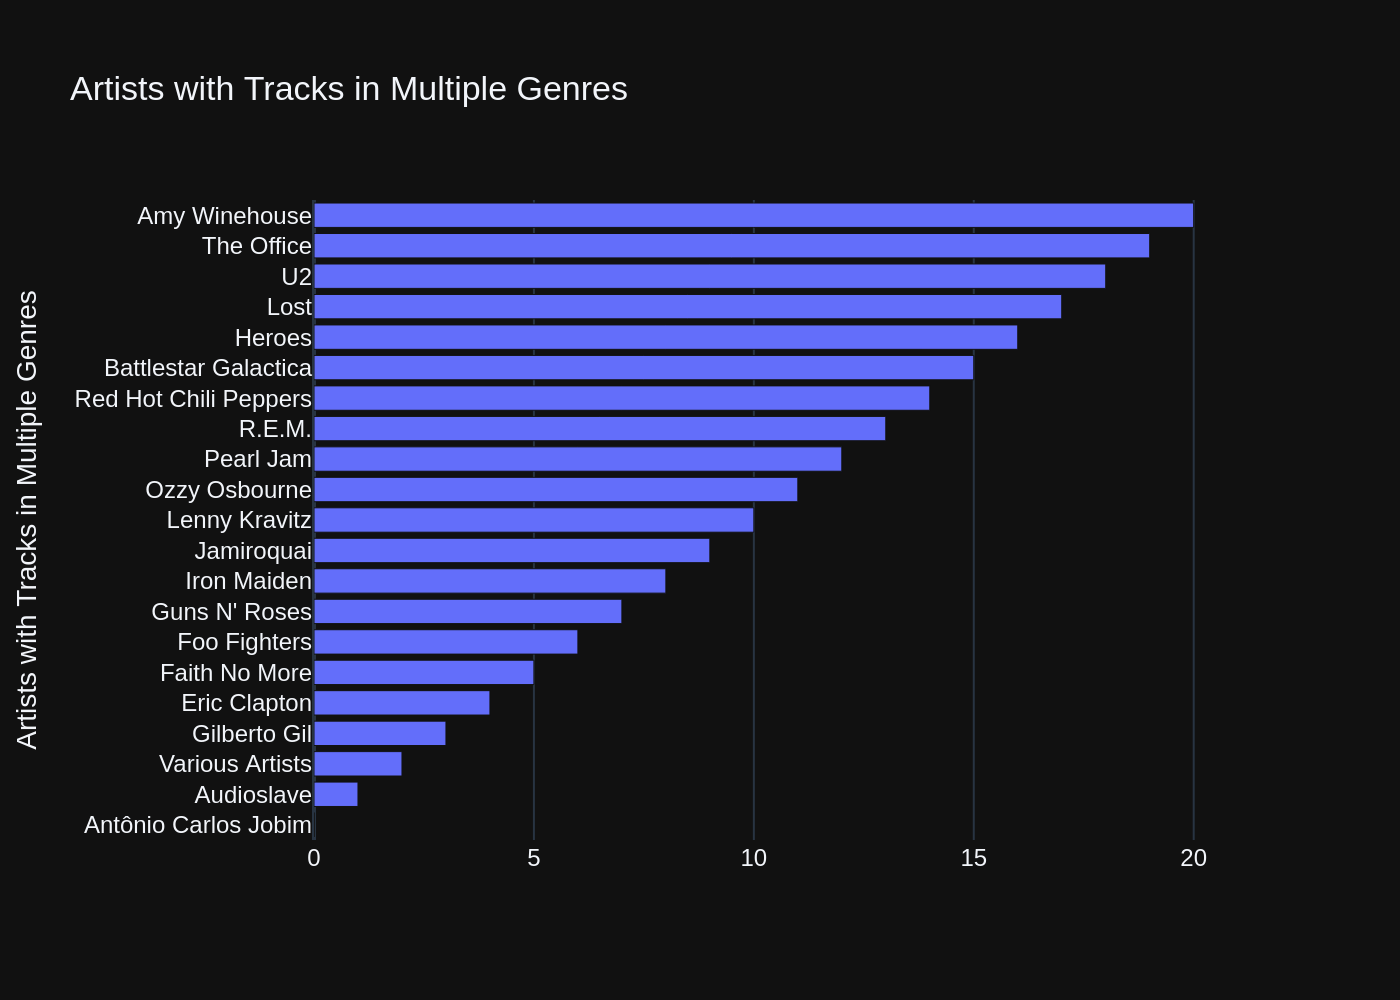

('SELECT ar.Name \nFROM artists ar \nJOIN albums a ON ar.ArtistId = a.ArtistId  \nJOIN tracks t ON a.AlbumId = t.AlbumId  \nGROUP BY ar.ArtistId \nHAVING COUNT(DISTINCT t.GenreId) > 1',
                      Name
 0    Antônio Carlos Jobim
 1              Audioslave
 2         Various Artists
 3            Gilberto Gil
 4            Eric Clapton
 5           Faith No More
 6            Foo Fighters
 7           Guns N' Roses
 8             Iron Maiden
 9              Jamiroquai
 10          Lenny Kravitz
 11          Ozzy Osbourne
 12              Pearl Jam
 13                 R.E.M.
 14  Red Hot Chili Peppers
 15   Battlestar Galactica
 16                 Heroes
 17                   Lost
 18                     U2
 19             The Office
 20          Amy Winehouse,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'index=%{x}<br>Artists with Tracks in Multiple Genres=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {

In [39]:
question = """  
     Identify artists who have albums with tracks appearing in multiple genres:


"""

vn.ask(question=question)

### Check completion time

In [40]:
ts_stop = time()

elapsed_time = ts_stop - ts_start
print(f"test running on '{hostname}' with '{model_name}' LLM took : {elapsed_time:.2f} sec")

test running on 'ducklover1' with 'qwen2:7b' LLM took : 1649.71 sec


## Launch the User Interface
![vanna-flask](https://vanna.ai/blog/img/vanna-flask.gif)

## Next Steps
Using Vanna via Jupyter notebooks is great for getting started but check out additional customizable interfaces like the 
- [Streamlit app](https://github.com/vanna-ai/vanna-streamlit)
- [Flask app](https://github.com/vanna-ai/vanna-flask)
- [Slackbot](https://github.com/vanna-ai/vanna-slack)
